## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
plt.style.use('fivethirtyeight')

## To make it visually apealing

In [3]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Installing fredapi to collect the data

In [4]:
#%pip install fredapi > /dev/null

In [5]:
from fredapi import Fred

## To get the saved api keys

In [7]:
import os
fred_api = os.getenv('FRED_API')

## Create the fred object

In [8]:
fred = Fred(api_key=fred_api)

## Data collection

In [9]:
fred.search('S&P')

id realtime_start realtime_end  \
series id                                                        
CSUSHPINSA              CSUSHPINSA     2024-08-13   2024-08-13   
CSUSHPISA                CSUSHPISA     2024-08-13   2024-08-13   
SP500                        SP500     2024-08-13   2024-08-13   
SPCS20RSA                SPCS20RSA     2024-08-13   2024-08-13   
SPCS20RNSA              SPCS20RNSA     2024-08-13   2024-08-13   
...                            ...            ...          ...   
DDOI02CYA156NWDB  DDOI02CYA156NWDB     2024-08-13   2024-08-13   
DDDI05DZA156NWDB  DDDI05DZA156NWDB     2024-08-13   2024-08-13   
DDDM07ECA156NWDB  DDDM07ECA156NWDB     2024-08-13   2024-08-13   
DDDI02CYA156NWDB  DDDI02CYA156NWDB     2024-08-13   2024-08-13   
DDDI01PHA156NWDB  DDDI01PHA156NWDB     2024-08-13   2024-08-13   

                                                              title  \
series id                                                             
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
CSUSHPISA         S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
SPCS20RSA         S&P CoreLogic Case-Shiller 20-City Composite H...   
SPCS20RNSA        S&P CoreLogic Case-Shiller 20-City Composite H...   
...                                                             ...   
DDOI02CYA156NWDB                    Bank Deposits to GDP for Cyprus   
DDDI05DZA156NWDB              Liquid Liabilities to GDP for Algeria   
DDDM07ECA156NWDB  Outstanding Total International Debt Securitie...   
DDDI02CYA156NWDB        Deposit Money Bank Assets to GDP for Cyprus   
DDDI01PHA156NWDB  Private Credit by Deposit Money Banks to GDP f...   

                 observation_start observation_end     frequency  \
series id                                                          
CSUSHPINSA              1987-01-01      2024-05-01       Monthly   
CSUSHPISA               1987-01-01      2024-05-01       Monthly   
SP500                   2014-08-14      2024-08-13  Daily, Close   
SPCS20RSA               2000-01-01      2024-05-01       Monthly   
SPCS20RNSA              2000-01-01      2024-05-01       Monthly   
...                            ...             ...           ...   
DDOI02CYA156NWDB        1975-01-01      2007-01-01        Annual   
DDDI05DZA156NWDB        1964-01-01      2021-01-01        Annual   
DDDM07ECA156NWDB        1980-01-01      2020-01-01        Annual   
DDDI02CYA156NWDB        1975-01-01      2021-01-01        Annual   
DDDI01PHA156NWDB        1960-01-01      2021-01-01        Annual   

                 frequency_short               units         units_short  \
series id                                                                  
CSUSHPINSA                     M  Index Jan 2000=100  Index Jan 2000=100   
CSUSHPISA                      M  Index Jan 2000=100  Index Jan 2000=100   
SP500                          D               Index               Index   
SPCS20RSA                      M  Index Jan 2000=100  Index Jan 2000=100   
SPCS20RNSA                     M  Index Jan 2000=100  Index Jan 2000=100   
...                          ...                 ...                 ...   
DDOI02CYA156NWDB               A             Percent                   %   
DDDI05DZA156NWDB               A             Percent                   %   
DDDM07ECA156NWDB               A             Percent                   %   
DDDI02CYA156NWDB               A             Percent                   %   
DDDI01PHA156NWDB               A             Percent                   %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
CSUSHPINSA        Not Seasonally Adjusted                       NSA   
CSUSHPISA             Seasonally Adjusted                        SA   
SP500             Not Seasonally Adjusted                       NSA   
SPCS20RSA           

## As we can see we could only gatherd 1000 rows this is because the search object has a limit parameter with 1000 default value we can change this parameter anytime 

In [10]:
sp_search = fred.search('S&P',order_by='popularity')

In [11]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-08-13   2024-08-13   
CSUSHPINSA              CSUSHPINSA     2024-08-13   2024-08-13   
SP500                        SP500     2024-08-13   2024-08-13   
MEHOINUSA672N        MEHOINUSA672N     2024-08-13   2024-08-13   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-08-13   2024-08-13   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-08-13   2024-08-13   
DDDI01GTA156NWDB  DDDI01GTA156NWDB     2024-08-13   2024-08-13   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-08-13   2024-08-13   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-08-13   2024-08-13   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-08-13   2024-08-13   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
DDDI01GTA156NWDB  Private Credit by Deposit Money Banks to GDP f...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-08-12  Daily, Close   
CSUSHPINSA              1987-01-01      2024-05-01       Monthly   
SP500                   2014-08-14      2024-08-13  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-08-12  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2020-01-01        Annual   
DDDI01GTA156NWDB        1960-01-01      2021-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDDI12SMA156NWDB               A                         Percent   
DDDI01GTA156NWDB               A                         Percent   
Q03069USQ605NNBR               Q               Thousands of Tons   
CSHXCPVEA156NRUG               A                         Percent   
CSHMCPNPA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

## Now pulling raw data from one of those series, we can also provide a time frame using observation_start/end parameter

In [12]:
fred.get_series(series_id='SP500')

2014-08-14    1955.18
2014-08-15    1955.06
2014-08-18    1971.74
2014-08-19    1981.60
2014-08-20    1986.51
               ...   
2024-08-07    5199.50
2024-08-08    5319.31
2024-08-09    5344.16
2024-08-12    5344.39
2024-08-13    5434.43
Length: 2609, dtype: float64

## This is a panda series, store it in an object

In [13]:
sp500 = fred.get_series(series_id='SP500')

In [14]:
sp500.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 2609 entries, 2014-08-14 to 2024-08-13
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2516 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB


In [15]:
sp500.reset_index()

index        0
0    2014-08-14  1955.18
1    2014-08-15  1955.06
2    2014-08-18  1971.74
3    2014-08-19  1981.60
4    2014-08-20  1986.51
...         ...      ...
2604 2024-08-07  5199.50
2605 2024-08-08  5319.31
2606 2024-08-09  5344.16
2607 2024-08-12  5344.39
2608 2024-08-13  5434.43

[2609 rows x 2 columns]

In [16]:
sp500.index = pd.to_datetime(sp500.index)

## Now if we plot it just to look at the data

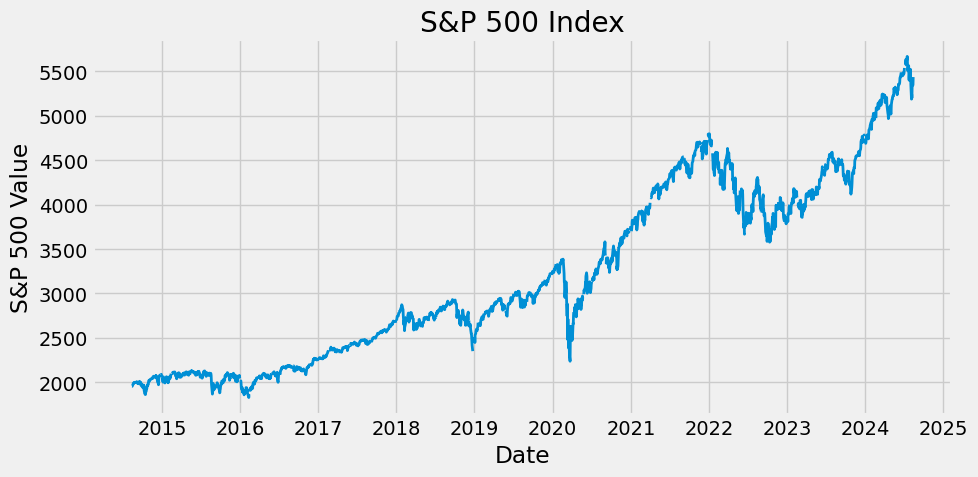

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(sp500.index, sp500.values,lw=2)
plt.xlabel('Date')
plt.ylabel('S&P 500 Value')
plt.title('S&P 500 Index') 
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Collect some more data

In [18]:
fred.search('unemployment')

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-08-13   2024-08-13   
UNRATENSA                          UNRATENSA     2024-08-13   2024-08-13   
UNEMPLOY                            UNEMPLOY     2024-08-13   2024-08-13   
NROU                                    NROU     2024-08-13   2024-08-13   
CCSA                                    CCSA     2024-08-13   2024-08-13   
...                                      ...            ...          ...   
LAUCN340030000000003A  LAUCN340030000000003A     2024-08-13   2024-08-13   
LMUNRRTTLUM156S              LMUNRRTTLUM156S     2024-08-13   2024-08-13   
LNS14000315                      LNS14000315     2024-08-13   2024-08-13   
LNU04032222                      LNU04032222     2024-08-13   2024-08-13   
LNU04032223                      LNU04032223     2024-08-13   2024-08-13   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   
LMUNRRTTLUM156S        Infra-Annual Registered Unemployment and Job V...   
LNS14000315                            Unemployment Rate - Married Women   
LNU04032222            Unemployment Rate - Natural Resources, Constru...   
LNU04032223            Unemployment Rate - Farming, Fishing, and Fore...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-07-01   
UNRATENSA                    1948-01-01      2024-07-01   
UNEMPLOY                     1948-01-01      2024-07-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-07-27   
...                                 ...             ...   
LAUCN340030000000003A        1990-01-01      2023-01-01   
LMUNRRTTLUM156S              1995-01-01      2023-12-01   
LNS14000315                  1955-01-01      2024-07-01   
LNU04032222                  2000-01-01      2024-07-01   
LNU04032223                  2000-01-01      2024-07-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUCN340030000000003A                   Annual               A   
LMUNRRTTLUM156S                        Monthly               M   
LNS14000315                            Monthly               M   
LNU04032222                            Monthly               M   
LNU04032223                            Monthly               M   

                                             units  \
series id                                            
UNRATE                                     Percent   
UNRATENSA                                  Percent   
UNEMPLOY                      Thousands of Persons   
NROU                                       Percent   
CCSA                                        Number   
...                                            ...   
LAUCN

In [19]:
unemployment = fred.search('unemployment')

## Let's selected any of the series above, we selected the first one

In [20]:
fred.get_series('UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
Length: 919, dtype: float64

In [21]:
unrate = fred.get_series('UNRATE')

In [24]:
unrate.to_frame(name='unemp_rate')

unemp_rate
1948-01-01         3.4
1948-02-01         3.8
1948-03-01         4.0
1948-04-01         3.9
1948-05-01         3.5
...                ...
2024-03-01         3.8
2024-04-01         3.9
2024-05-01         4.0
2024-06-01         4.1
2024-07-01         4.3

[919 rows x 1 columns]

In [24]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
Length: 919, dtype: float64

<Axes: >

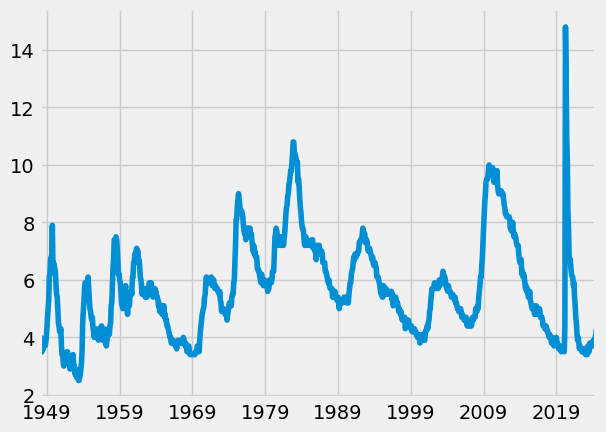

In [25]:
unrate.plot()

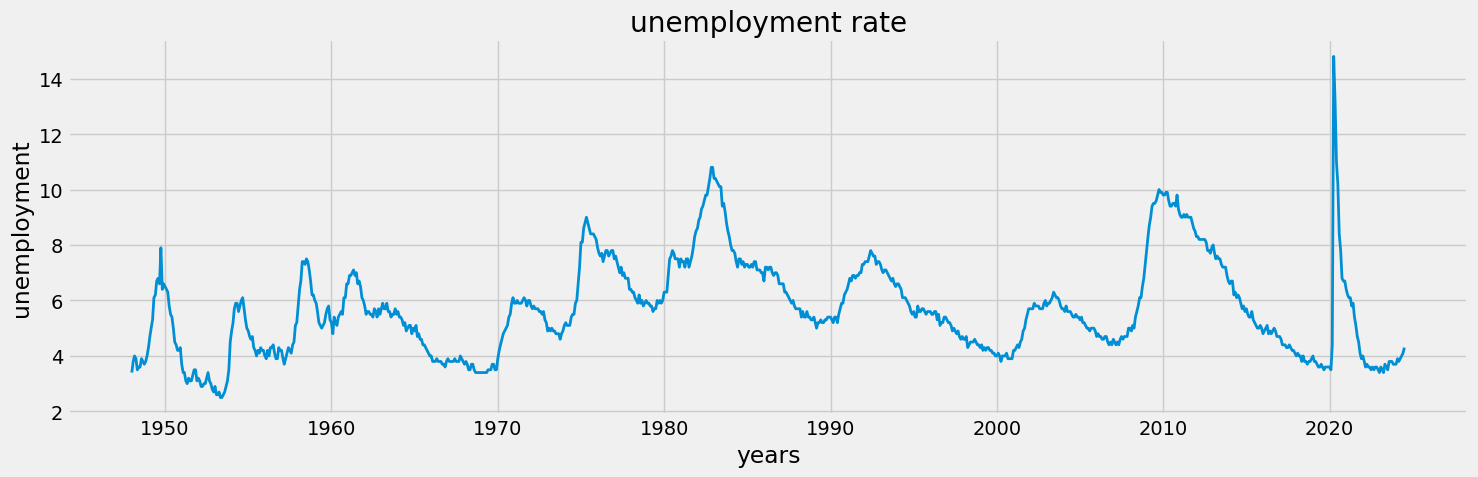

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(unrate.index, unrate.values,lw=2)
plt.xlabel('years')
plt.ylabel('unemployment')
plt.title('unemployment rate') 
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

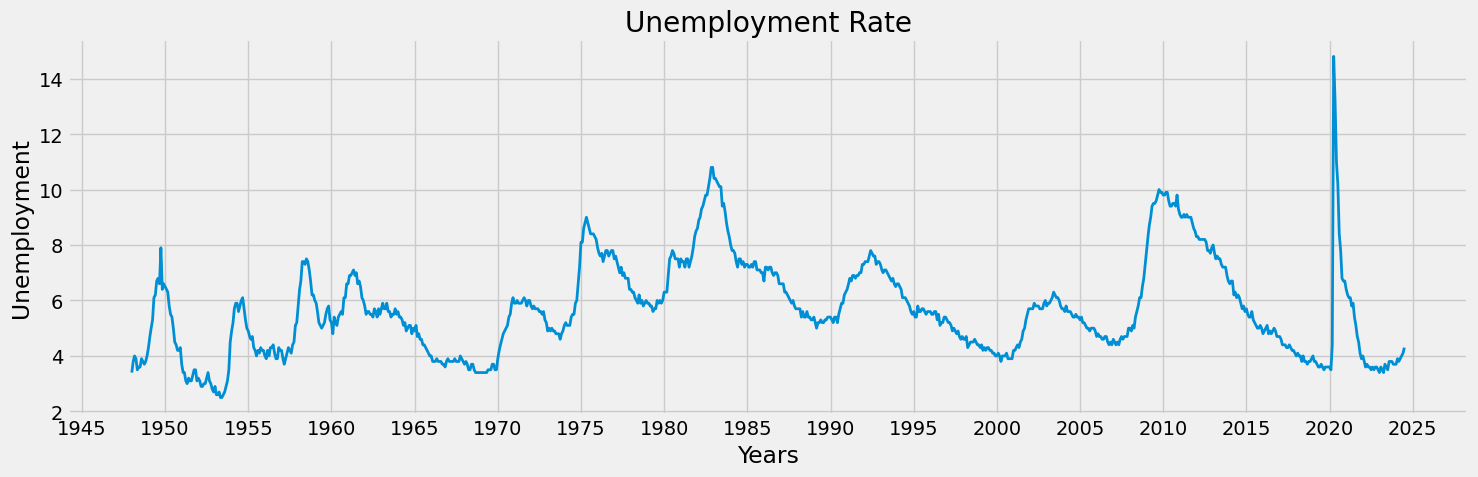

In [27]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 5))
plt.plot(unrate.index, unrate.values, lw=2)

# Set x-axis to have ticks every 5 years
years = mdates.YearLocator(5)  # Every 5 years
years_fmt = mdates.DateFormatter('%Y')

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Labels and Title
plt.xlabel('Years')
plt.ylabel('Unemployment')
plt.title('Unemployment Rate')

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()


## To get more recent data

In [28]:
fred.get_series('UNRATE',observation_start='2022-04-01',observation_end='2024-08-01')

2022-04-01    3.7
2022-05-01    3.6
2022-06-01    3.6
2022-07-01    3.5
2022-08-01    3.6
2022-09-01    3.5
2022-10-01    3.6
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
2023-08-01    3.8
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
2024-03-01    3.8
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
dtype: float64

In [29]:
unrate_recent = fred.get_series('UNRATE',observation_start='2022-04-01',observation_end='2024-08-01')

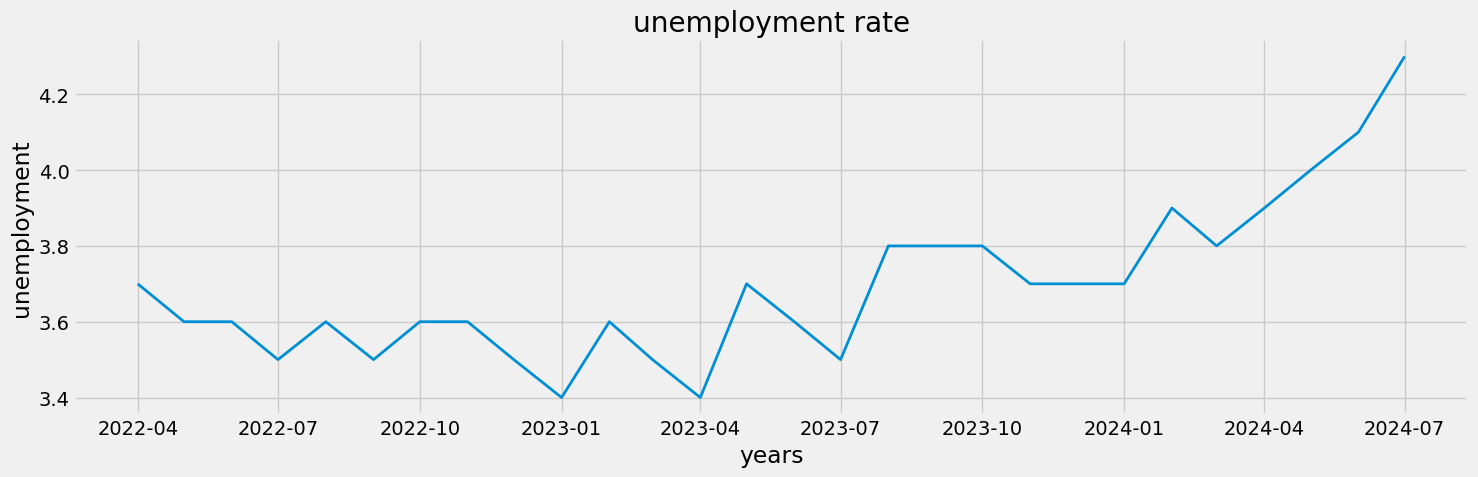

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(unrate_recent.index, unrate_recent.values,lw=2)
plt.xlabel('years')
plt.ylabel('unemployment')
plt.title('unemployment rate') 
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Get the data state wise

In [31]:
fred.search('unemployment rate state',filter=('frequency','Monthly'))

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2024-08-13   2024-08-13   
UNRATENSA      UNRATENSA     2024-08-13   2024-08-13   
LNS14000006  LNS14000006     2024-08-13   2024-08-13   
UNEMPLOY        UNEMPLOY     2024-08-13   2024-08-13   
LNU04000006  LNU04000006     2024-08-13   2024-08-13   
...                  ...            ...          ...   
LNU04032220  LNU04032220     2024-08-13   2024-08-13   
SCMARI7URN    SCMARI7URN     2024-08-13   2024-08-13   
VAALBE7URN    VAALBE7URN     2024-08-13   2024-08-13   
HAGE124UR      HAGE124UR     2024-08-13   2024-08-13   
MIINGH5URN    MIINGH5URN     2024-08-13   2024-08-13   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
LNS14000006      Unemployment Rate - Black or African American   
UNEMPLOY                                    Unemployment Level   
LNU04000006      Unemployment Rate - Black or African American   
...                                                        ...   
LNU04032220  Unemployment Rate - Sales and Related Occupations   
SCMARI7URN              Unemployment Rate in Marion County, SC   
VAALBE7URN           Unemployment Rate in Albemarle County, VA   
HAGE124UR    Unemployment Rate in Hagerstown-Martinsburg, M...   
MIINGH5URN              Unemployment Rate in Ingham County, MI   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2024-07-01   Monthly               M   
UNRATENSA          1948-01-01      2024-07-01   Monthly               M   
LNS14000006        1972-01-01      2024-07-01   Monthly               M   
UNEMPLOY           1948-01-01      2024-07-01   Monthly               M   
LNU04000006        1972-01-01      2024-07-01   Monthly               M   
...                       ...             ...       ...             ...   
LNU04032220        2000-01-01      2024-07-01   Monthly               M   
SCMARI7URN         1990-01-01      2024-06-01   Monthly               M   
VAALBE7URN         1990-01-01      2024-06-01   Monthly               M   
HAGE124UR          1990-01-01      2024-06-01   Monthly               M   
MIINGH5URN         1990-01-01      2024-06-01   Monthly               M   

                            units        units_short  \
series id                                              
UNRATE                    Percent                  %   
UNRATENSA                 Percent                  %   
LNS14000006               Percent                  %   
UNEMPLOY     Thousands of Persons  Thous. of Persons   
LNU04000006               Percent                  %   
...                           ...                ...   
LNU04032220               Percent                  %   
SCMARI7URN                Percent                  %   
VAALBE7URN                Percent                  %   
HAGE124UR                 Percent                  %   
MIINGH5URN                Percent                  %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
UNRATE                Seasonally Adjusted                        SA   
UNRATENSA         Not Seasonally Adjusted                       NSA   
LNS14000006           Seasonally Adjusted                        SA   
UNEMPLOY              Seasonally Adjusted                        SA   
LNU04000006       Not Seasonally Adjusted                       NSA   
...                                   ...                       ...   
LNU04032220       Not Seasonally Adjusted                       NSA   
SCMARI7URN        Not Seasonally Adjusted                       NSA   
VAALBE7URN        N

In [32]:
unemployment_df = fred.search('unemployment rate state',filter=('frequency','Monthly'))

## Filtering through the dataframe

In [33]:
unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

id realtime_start realtime_end  \
series id                                                            
UNRATE                          UNRATE     2024-08-13   2024-08-13   
LNS14000006                LNS14000006     2024-08-13   2024-08-13   
U6RATE                          U6RATE     2024-08-13   2024-08-13   
CAUR                              CAUR     2024-08-13   2024-08-13   
TXUR                              TXUR     2024-08-13   2024-08-13   
...                                ...            ...          ...   
LNS14000150                LNS14000150     2024-08-13   2024-08-13   
NEIPTERM156SFRBRIC  NEIPTERM156SFRBRIC     2024-08-13   2024-08-13   
LBSSA10                        LBSSA10     2024-08-13   2024-08-13   
LBSSA44                        LBSSA44     2024-08-13   2024-08-13   
LRUN25TTUSM156S        LRUN25TTUSM156S     2024-08-13   2024-08-13   

                                                                title  \
series id                                                               
UNRATE                                              Unemployment Rate   
LNS14000006             Unemployment Rate - Black or African American   
U6RATE              Total Unemployed, Plus All Persons Marginally ...   
CAUR                                  Unemployment Rate in California   
TXUR                                       Unemployment Rate in Texas   
...                                                               ...   
LNS14000150                           Unemployment Rate - Married Men   
NEIPTERM156SFRBRIC  Hornstein-Kudlyak-Lange Non-Employment Index i...   
LBSSA10                   Labor Force Participation Rate for Delaware   
LBSSA44               Labor Force Participation Rate for Rhode Island   
LRUN25TTUSM156S     Infra-Annual Labor Statistics: Unemployment Ra...   

                   observation_start observation_end frequency  \
series id                                                        
UNRATE                    1948-01-01      2024-07-01   Monthly   
LNS14000006               1972-01-01      2024-07-01   Monthly   
U6RATE                    1994-01-01      2024-07-01   Monthly   
CAUR                      1976-01-01      2024-06-01   Monthly   
TXUR                      1976-01-01      2024-06-01   Monthly   
...                              ...             ...       ...   
LNS14000150               1955-01-01      2024-07-01   Monthly   
NEIPTERM156SFRBRIC        1994-01-01      2024-07-01   Monthly   
LBSSA10                   1976-01-01      2024-06-01   Monthly   
LBSSA44                   1976-01-01      2024-06-01   Monthly   
LRUN25TTUSM156S           1955-01-01      2024-06-01   Monthly   

                   frequency_short    units units_short  seasonal_adjustment  \
series id                                                                      
UNRATE                           M  Percent           %  Seasonally Adjusted   
LNS14000006                      M  Percent           %  Seasonally Adjusted   
U6RATE                           M  Percent           %  Seasonally Adjusted   
CAUR                             M  Percent           %  Seasonally Adjusted   
TXUR                             M  Percent           %  Seasonally Adjusted   
...                            ...      ...         ...                  ...   
LNS14000150                      M  Percent           %  Seasonally Adjusted   
NEIPTERM156SFRBRIC               M  Percent           %  Seasonally Adjusted   
LBSSA10                          M  Percent           %  Seasonally Adjusted   
LBSSA44                          M  Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S                  M  Percent           %  Seasonally Adjusted   

                   seasonal_adjustment_short               last_updated  \
series id                                                                 
UNRATE                                    SA  2024-08-02 07:46:02-05:00   
LNS14000006                               SA  2024

In [34]:
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

## Now we can run multiple analysis here depending on the title. Let's just analyze on a broad prospects

In [35]:
unemployment_df['title'].str.contains('Unemployment Rate')

series id
UNRATE                 True
LNS14000006            True
U6RATE                False
CAUR                   True
TXUR                   True
                      ...  
LNS14000150            True
NEIPTERM156SFRBRIC    False
LBSSA10               False
LBSSA44               False
LRUN25TTUSM156S        True
Name: title, Length: 161, dtype: bool

## Let's get the dataframe with all the unemployment rate

In [36]:
unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-08-13   2024-08-13   
LNS14000006            LNS14000006     2024-08-13   2024-08-13   
CAUR                          CAUR     2024-08-13   2024-08-13   
TXUR                          TXUR     2024-08-13   2024-08-13   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-08-13   2024-08-13   
...                            ...            ...          ...   
LNS14000048            LNS14000048     2024-08-13   2024-08-13   
LNS14000089            LNS14000089     2024-08-13   2024-08-13   
M08311USM156SNBR  M08311USM156SNBR     2024-08-13   2024-08-13   
LNS14000150            LNS14000150     2024-08-13   2024-08-13   
LRUN25TTUSM156S    LRUN25TTUSM156S     2024-08-13   2024-08-13   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   
LRUN25TTUSM156S   Infra-Annual Labor Statistics: Unemployment Ra...   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-07-01   Monthly               M   
LNS14000006             1972-01-01      2024-07-01   Monthly               M   
CAUR                    1976-01-01      2024-06-01   Monthly               M   
TXUR                    1976-01-01      2024-06-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000048             1948-01-01      2024-07-01   Monthly               M   
LNS14000089             1948-01-01      2024-07-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-07-01   Monthly               M   
LRUN25TTUSM156S         1955-01-01      2024-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-08-02 07:46:02-05:00   
LNS14000006                             SA  2024-08-02 07:46:02-05:00   
CAUR                                    SA  2024-07-22 10:36:02-05:00   
TXUR                                

In [37]:
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

## so as we can see this dataframe is just the tip of the iceberg the actual data that we need is located  on the series ID calumn so we'll go through each of each item of the series ID and run in loop to find out the actual unemployment data. So we'll run a loop and store the data in a list.

## As we see that the series ID the actual index of the dataframe, so let's just bring the index that contains all the values

In [38]:
unemployment_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

## So as we can see there's many column that has data that we don't need so we'll only keep the columns that belongs to state unemployment 

In [39]:
unemployment_df.loc[unemployment_df['id'].str.contains('UR')]

id realtime_start realtime_end  \
series id                                       
CAUR         CAUR     2024-08-13   2024-08-13   
TXUR         TXUR     2024-08-13   2024-08-13   
NYUR         NYUR     2024-08-13   2024-08-13   
FLUR         FLUR     2024-08-13   2024-08-13   
PAUR         PAUR     2024-08-13   2024-08-13   
OHUR         OHUR     2024-08-13   2024-08-13   
MIUR         MIUR     2024-08-13   2024-08-13   
ALUR         ALUR     2024-08-13   2024-08-13   
MAUR         MAUR     2024-08-13   2024-08-13   
NCUR         NCUR     2024-08-13   2024-08-13   
ILUR         ILUR     2024-08-13   2024-08-13   
NJUR         NJUR     2024-08-13   2024-08-13   
GAUR         GAUR     2024-08-13   2024-08-13   
COUR         COUR     2024-08-13   2024-08-13   
AZUR         AZUR     2024-08-13   2024-08-13   
WIUR         WIUR     2024-08-13   2024-08-13   
VAUR         VAUR     2024-08-13   2024-08-13   
KYUR         KYUR     2024-08-13   2024-08-13   
SCUR         SCUR     2024-08-13   2024-08-13   
NMUR         NMUR     2024-08-13   2024-08-13   
MNUR         MNUR     2024-08-13   2024-08-13   
TNUR         TNUR     2024-08-13   2024-08-13   
WAUR         WAUR     2024-08-13   2024-08-13   
MDUR         MDUR     2024-08-13   2024-08-13   
ORUR         ORUR     2024-08-13   2024-08-13   
WVUR         WVUR     2024-08-13   2024-08-13   
NVUR         NVUR     2024-08-13   2024-08-13   
ARUR         ARUR     2024-08-13   2024-08-13   
OKUR         OKUR     2024-08-13   2024-08-13   
MOUR         MOUR     2024-08-13   2024-08-13   
AKUR         AKUR     2024-08-13   2024-08-13   
IAUR         IAUR     2024-08-13   2024-08-13   
UTUR         UTUR     2024-08-13   2024-08-13   
PRUR         PRUR     2024-08-13   2024-08-13   
INUR         INUR     2024-08-13   2024-08-13   
LAUR         LAUR     2024-08-13   2024-08-13   
HIUR         HIUR     2024-08-13   2024-08-13   
NDUR         NDUR     2024-08-13   2024-08-13   
MTUR         MTUR     2024-08-13   2024-08-13   
DCUR         DCUR     2024-08-13   2024-08-13   
MSUR         MSUR     2024-08-13   2024-08-13   
MEUR         MEUR     2024-08-13   2024-08-13   
NEUR         NEUR     2024-08-13   2024-08-13   
CTUR         CTUR     2024-08-13   2024-08-13   
IDUR         IDUR     2024-08-13   2024-08-13   
NHUR         NHUR     2024-08-13   2024-08-13   
RIUR         RIUR     2024-08-13   2024-08-13   
KSUR         KSUR     2024-08-13   2024-08-13   
WYUR         WYUR     2024-08-13   2024-08-13   
DEUR         DEUR     2024-08-13   2024-08-13   
VTUR         VTUR     2024-08-13   2024-08-13   
SDUR         SDUR     2024-08-13   2024-08-13   
CMWRUR     CMWRUR     2024-08-13   2024-08-13   
CSOUUR     CSOUUR     2024-08-13   2024-08-13   
CNERUR     CNERUR     2024-08-13   2024-08-13   
CWSTUR     CWSTUR     2024-08-13   2024-08-13   
CNEWUR     CNEWUR     2024-08-13   2024-08-13   

                                                      title observation_start  \
series id                                                                       
CAUR                        Unemployment Rate in California        1976-01-01   
TXUR                             Unemployment Rate in Texas        1976-01-01   
NYUR                          Unemployment Rate in New York        1976-01-01   
FLUR                           Unemployment Rate in Florida        1976-01-01   
PAUR                      Unemployment Rate in Pennsylvania        1976-01-01   
OHUR                              Unemployment Rate in Ohio        1976-01-01   
MIUR                          Unemployment Rate in Michigan        1976-01-01   
ALUR                           Unemployment Rate in Alabama        1976-01-01   
MAUR                     Unemployment Rate in Massachusetts        1976-01-01   
NCUR                    Unemployment Rate in North Carolina        1976-01-01   
ILUR                          Unemployment Rate in Illinois        1976-01-01   
NJUR                        Unemployment Rate in New Jersey        197

## To look at the shape

In [40]:
unemployment_df.loc[unemployment_df['id'].str.contains('UR')].shape

(57, 15)

In [41]:
unemployment_df = unemployment_df.loc[unemployment_df['id'].str.contains('UR')]

In [42]:
unemployment_df.tail(10)

id realtime_start realtime_end  \
series id                                       
KSUR         KSUR     2024-08-13   2024-08-13   
WYUR         WYUR     2024-08-13   2024-08-13   
DEUR         DEUR     2024-08-13   2024-08-13   
VTUR         VTUR     2024-08-13   2024-08-13   
SDUR         SDUR     2024-08-13   2024-08-13   
CMWRUR     CMWRUR     2024-08-13   2024-08-13   
CSOUUR     CSOUUR     2024-08-13   2024-08-13   
CNERUR     CNERUR     2024-08-13   2024-08-13   
CWSTUR     CWSTUR     2024-08-13   2024-08-13   
CNEWUR     CNEWUR     2024-08-13   2024-08-13   

                                                      title observation_start  \
series id                                                                       
KSUR                            Unemployment Rate in Kansas        1976-01-01   
WYUR                           Unemployment Rate in Wyoming        1976-01-01   
DEUR                          Unemployment Rate in Delaware        1976-01-01   
VTUR                           Unemployment Rate in Vermont        1976-01-01   
SDUR                      Unemployment Rate in South Dakota        1976-01-01   
CMWRUR           Unemployment Rate in Midwest Census Region        1976-01-01   
CSOUUR             Unemployment Rate in South Census Region        1976-01-01   
CNERUR         Unemployment Rate in Northeast Census Region        1976-01-01   
CWSTUR              Unemployment Rate in West Census Region        1976-01-01   
CNEWUR     Unemployment Rate in New England Census Division        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
KSUR           2024-06-01   Monthly               M  Percent           %   
WYUR           2024-06-01   Monthly               M  Percent           %   
DEUR           2024-06-01   Monthly               M  Percent           %   
VTUR           2024-06-01   Monthly               M  Percent           %   
SDUR           2024-06-01   Monthly               M  Percent           %   
CMWRUR         2024-06-01   Monthly               M  Percent           %   
CSOUUR         2024-06-01   Monthly               M  Percent           %   
CNERUR         2024-06-01   Monthly               M  Percent           %   
CWSTUR         2024-06-01   Monthly               M  Percent           %   
CNEWUR         2024-06-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
KSUR       Seasonally Adjusted                        SA   
WYUR       Seasonally Adjusted                        SA   
DEUR       Seasonally Adjusted                        SA   
VTUR       Seasonally Adjusted                        SA   
SDUR       Seasonally Adjusted                        SA   
CMWRUR     Seasonally Adjusted                        SA   
CSOUUR     Seasonally Adjusted                        SA   
CNERUR     Seasonally Adjusted                        SA   
CWSTUR     Seasonally Adjusted                        SA   
CNEWUR     Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
KSUR       2024-07-22 10:36:15-05:00         12  None  
WYUR       2024-07-22 10:36:13-05:00         17  None  
DEUR       2024-07-22 10:36:14-05:00         16  None  
VTUR       2024-07-22 10:36:14-05:00         15  None  
SDUR       2024-07-22 10:36:14-05:00         13  None  
CMWRUR     2024-07-22 10:36:15-05:00         13  None  
CSOUUR     2024-07-22 10:36:17-05:00          8  None  
CNERUR     2024-07-22 10:36:18-05:00          4  None  
CWSTUR     2024-07-22 10:36:18-05:00          6  None  
CNEWUR     2024-07-22 10:36:16-05:00          6  None

## So we'll drop last 5 rows as they are belongs to some regions because we only want the states

In [43]:
unemployment_df = unemployment_df.iloc[:-5]

## To see all the values

In [44]:
#pd.set_option('max_columns', 500)

## Now we have go through each series to get the unemployment data
## Let's just go through the first one to see how does it looks like

In [45]:
for i in unemployment_df.index:
    result = fred.get_series(i)
    break

## This is the first one and When we convert it to a dataframe

In [46]:
result.to_frame(name=i)

CAUR
1976-01-01   9.2
1976-02-01   9.2
1976-03-01   9.1
1976-04-01   9.1
1976-05-01   9.0
...          ...
2024-02-01   5.3
2024-03-01   5.3
2024-04-01   5.3
2024-05-01   5.2
2024-06-01   5.2

[582 rows x 1 columns]

## Now we 're gonna do this to all the series and store the values in a list

In [47]:
all_results = []
for i in unemployment_df.index:
    result = fred.get_series(i)
    result = result.to_frame(name=i)
    all_results.append(result)

## Now we can navigate through all the elements in the list

In [48]:
all_results[5]

OHUR
1976-01-01   8.1
1976-02-01   8.1
1976-03-01   8.1
1976-04-01   8.0
1976-05-01   7.8
...          ...
2024-02-01   3.7
2024-03-01   3.8
2024-04-01   4.0
2024-05-01   4.2
2024-06-01   4.4

[582 rows x 1 columns]

## We can merge all the values in a dataframe. If some of these series doesn't have values for the same date and those values are replaced as nan values in that case we'll drop them.

In [49]:
pd.concat(all_results,axis=1)

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ...  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4  ...   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4  ...   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4  ...   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3  ...   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5  ...   
2024-03-01   5.3   3.9   4.3   3.2   3.4   3.8   3.9   3.0   2.9   3.5  ...   
2024-04-01   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   3.5  ...   
2024-05-01   5.2   4.0   4.2   3.3   3.4   4.2   3.9   3.0   3.0   3.6  ...   
2024-06-01   5.2   4.0   4.2   3.3   3.4   4.4   4.1   2.9   3.2   3.6  ...   

            NEUR  CTUR  IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1976-01-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-02-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-03-01   3.3   9.8   5.6   6.5   7.7   4.2   4.1   8.0   8.6   3.2  
1976-04-01   3.2   9.6   5.6   6.5   7.7   4.2   4.0   8.1   8.6   3.1  
1976-05-01   3.1   9.4   5.6   6.5   7.7   4.2   3.9   8.3   8.5   3.1  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2024-02-01   2.5   4.5   3.3   2.6   3.9   2.7   2.8   4.0   2.3   2.1  
2024-03-01   2.5   4.5   3.3   2.6   4.1   2.7   2.8   3.9   2.2   2.1  
2024-04-01   2.5   4.4   3.3   2.6   4.1   2.8   2.8   3.9   2.1   2.0  
2024-05-01   2.5   4.3   3.3   2.5   4.3   2.9   2.9   3.9   2.1   2.0  
2024-06-01   2.6   3.9   3.4   2.5   4.3   3.1   2.9   4.0   2.1   2.0  

[582 rows x 52 columns]

In [50]:
unemployment_state = pd.concat(all_results,axis=1)

## To check missing values
## It looks like Puerto Rico has some missing values

In [51]:
unemployment_state.isna().sum()

CAUR    0
TXUR    0
NYUR    0
FLUR    0
PAUR    0
OHUR    0
MIUR    0
ALUR    0
MAUR    0
NCUR    0
ILUR    0
NJUR    0
GAUR    0
COUR    0
AZUR    0
WIUR    0
VAUR    0
KYUR    0
SCUR    0
NMUR    0
MNUR    0
TNUR    0
WAUR    0
MDUR    0
ORUR    0
WVUR    0
NVUR    0
ARUR    0
OKUR    0
MOUR    0
AKUR    0
IAUR    0
UTUR    0
PRUR    2
INUR    0
LAUR    0
HIUR    0
NDUR    0
MTUR    0
DCUR    0
MSUR    0
MEUR    0
NEUR    0
CTUR    0
IDUR    0
NHUR    0
RIUR    0
KSUR    0
WYUR    0
DEUR    0
VTUR    0
SDUR    0
dtype: int64

<Axes: >

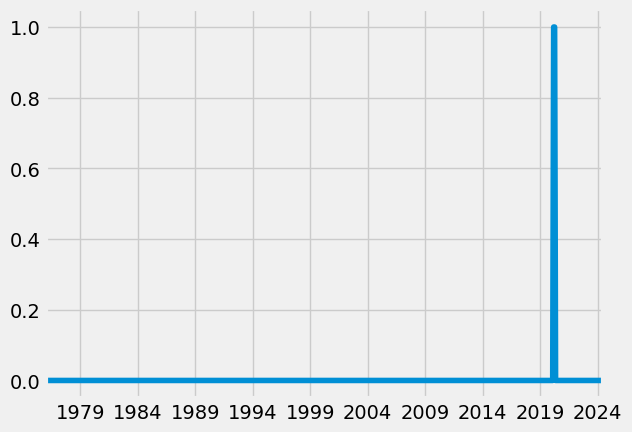

In [52]:
unemployment_state.isna().sum(axis=1).plot()

## We'll drop Puerto Rico as it has some missing values

In [53]:
unemployment_state.drop(['PRUR'],axis=1)

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ...  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4  ...   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4  ...   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4  ...   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3  ...   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2024-02-01   5.3   3.9   4.4   3.1   3.4   3.7   3.9   3.0   2.9   3.5  ...   
2024-03-01   5.3   3.9   4.3   3.2   3.4   3.8   3.9   3.0   2.9   3.5  ...   
2024-04-01   5.3   4.0   4.2   3.3   3.4   4.0   3.9   3.1   2.9   3.5  ...   
2024-05-01   5.2   4.0   4.2   3.3   3.4   4.2   3.9   3.0   3.0   3.6  ...   
2024-06-01   5.2   4.0   4.2   3.3   3.4   4.4   4.1   2.9   3.2   3.6  ...   

            NEUR  CTUR  IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1976-01-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-02-01   3.3   9.8   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3  
1976-03-01   3.3   9.8   5.6   6.5   7.7   4.2   4.1   8.0   8.6   3.2  
1976-04-01   3.2   9.6   5.6   6.5   7.7   4.2   4.0   8.1   8.6   3.1  
1976-05-01   3.1   9.4   5.6   6.5   7.7   4.2   3.9   8.3   8.5   3.1  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2024-02-01   2.5   4.5   3.3   2.6   3.9   2.7   2.8   4.0   2.3   2.1  
2024-03-01   2.5   4.5   3.3   2.6   4.1   2.7   2.8   3.9   2.2   2.1  
2024-04-01   2.5   4.4   3.3   2.6   4.1   2.8   2.8   3.9   2.1   2.0  
2024-05-01   2.5   4.3   3.3   2.5   4.3   2.9   2.9   3.9   2.1   2.0  
2024-06-01   2.6   3.9   3.4   2.5   4.3   3.1   2.9   4.0   2.1   2.0  

[582 rows x 51 columns]

In [54]:
unemployment_state = unemployment_state.drop(['PRUR'],axis=1)

## Let's change this short name to actual state name like 'CAUR' become 'California'

In [55]:
unemployment_df.head()

id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2024-08-13   2024-08-13   
TXUR       TXUR     2024-08-13   2024-08-13   
NYUR       NYUR     2024-08-13   2024-08-13   
FLUR       FLUR     2024-08-13   2024-08-13   
PAUR       PAUR     2024-08-13   2024-08-13   

                                       title observation_start  \
series id                                                        
CAUR         Unemployment Rate in California        1976-01-01   
TXUR              Unemployment Rate in Texas        1976-01-01   
NYUR           Unemployment Rate in New York        1976-01-01   
FLUR            Unemployment Rate in Florida        1976-01-01   
PAUR       Unemployment Rate in Pennsylvania        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
CAUR           2024-06-01   Monthly               M  Percent           %   
TXUR           2024-06-01   Monthly               M  Percent           %   
NYUR           2024-06-01   Monthly               M  Percent           %   
FLUR           2024-06-01   Monthly               M  Percent           %   
PAUR           2024-06-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
CAUR       Seasonally Adjusted                        SA   
TXUR       Seasonally Adjusted                        SA   
NYUR       Seasonally Adjusted                        SA   
FLUR       Seasonally Adjusted                        SA   
PAUR       Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2024-07-22 10:36:02-05:00         64  None  
TXUR       2024-07-22 10:36:02-05:00         56  None  
NYUR       2024-07-22 10:36:03-05:00         53  None  
FLUR       2024-07-22 10:36:03-05:00         51  None  
PAUR       2024-07-22 10:36:03-05:00         44  None

In [56]:
unemployment_df['title'].str.replace('Unemployment Rate in ','')

series id
CAUR                  California
TXUR                       Texas
NYUR                    New York
FLUR                     Florida
PAUR                Pennsylvania
OHUR                        Ohio
MIUR                    Michigan
ALUR                     Alabama
MAUR               Massachusetts
NCUR              North Carolina
ILUR                    Illinois
NJUR                  New Jersey
GAUR                     Georgia
COUR                    Colorado
AZUR                     Arizona
WIUR                   Wisconsin
VAUR                    Virginia
KYUR                    Kentucky
SCUR              South Carolina
NMUR                  New Mexico
MNUR                   Minnesota
TNUR                   Tennessee
WAUR                  Washington
MDUR                    Maryland
ORUR                      Oregon
WVUR               West Virginia
NVUR                      Nevada
ARUR                    Arkansas
OKUR                    Oklahoma
MOUR                    Missouri


## Now we can use 'to_dict' to map these names to the index

In [57]:
unemployment_df['title'].str.replace('Unemployment Rate in ','').to_dict()

{'CAUR': 'California',
 'TXUR': 'Texas',
 'NYUR': 'New York',
 'FLUR': 'Florida',
 'PAUR': 'Pennsylvania',
 'OHUR': 'Ohio',
 'MIUR': 'Michigan',
 'ALUR': 'Alabama',
 'MAUR': 'Massachusetts',
 'NCUR': 'North Carolina',
 'ILUR': 'Illinois',
 'NJUR': 'New Jersey',
 'GAUR': 'Georgia',
 'COUR': 'Colorado',
 'AZUR': 'Arizona',
 'WIUR': 'Wisconsin',
 'VAUR': 'Virginia',
 'KYUR': 'Kentucky',
 'SCUR': 'South Carolina',
 'NMUR': 'New Mexico',
 'MNUR': 'Minnesota',
 'TNUR': 'Tennessee',
 'WAUR': 'Washington',
 'MDUR': 'Maryland',
 'ORUR': 'Oregon',
 'WVUR': 'West Virginia',
 'NVUR': 'Nevada',
 'ARUR': 'Arkansas',
 'OKUR': 'Oklahoma',
 'MOUR': 'Missouri',
 'AKUR': 'Alaska',
 'IAUR': 'Iowa',
 'UTUR': 'Utah',
 'PRUR': 'Puerto Rico',
 'INUR': 'Indiana',
 'LAUR': 'Louisiana',
 'HIUR': 'Hawaii',
 'NDUR': 'North Dakota',
 'MTUR': 'Montana',
 'DCUR': 'the District of Columbia',
 'MSUR': 'Mississippi',
 'MEUR': 'Maine',
 'NEUR': 'Nebraska',
 'CTUR': 'Connecticut',
 'IDUR': 'Idaho',
 'NHUR': 'New Hampshire

## Let's save this dictionary 

In [58]:
id_to_state = unemployment_df['title'].str.replace('Unemployment Rate in ','').to_dict()

## Now to replace this new values

In [59]:
def state(pt):
    l = []
    for i in unemployment_state.columns:
        l.append(pt[i])

    return l

In [60]:
state(id_to_state)

['California',
 'Texas',
 'New York',
 'Florida',
 'Pennsylvania',
 'Ohio',
 'Michigan',
 'Alabama',
 'Massachusetts',
 'North Carolina',
 'Illinois',
 'New Jersey',
 'Georgia',
 'Colorado',
 'Arizona',
 'Wisconsin',
 'Virginia',
 'Kentucky',
 'South Carolina',
 'New Mexico',
 'Minnesota',
 'Tennessee',
 'Washington',
 'Maryland',
 'Oregon',
 'West Virginia',
 'Nevada',
 'Arkansas',
 'Oklahoma',
 'Missouri',
 'Alaska',
 'Iowa',
 'Utah',
 'Indiana',
 'Louisiana',
 'Hawaii',
 'North Dakota',
 'Montana',
 'the District of Columbia',
 'Mississippi',
 'Maine',
 'Nebraska',
 'Connecticut',
 'Idaho',
 'New Hampshire',
 'Rhode Island',
 'Kansas',
 'Wyoming',
 'Delaware',
 'Vermont',
 'South Dakota']

## we'll use list comprehetion for this

In [61]:
[id_to_state[i] for i in unemployment_state.columns]

['California',
 'Texas',
 'New York',
 'Florida',
 'Pennsylvania',
 'Ohio',
 'Michigan',
 'Alabama',
 'Massachusetts',
 'North Carolina',
 'Illinois',
 'New Jersey',
 'Georgia',
 'Colorado',
 'Arizona',
 'Wisconsin',
 'Virginia',
 'Kentucky',
 'South Carolina',
 'New Mexico',
 'Minnesota',
 'Tennessee',
 'Washington',
 'Maryland',
 'Oregon',
 'West Virginia',
 'Nevada',
 'Arkansas',
 'Oklahoma',
 'Missouri',
 'Alaska',
 'Iowa',
 'Utah',
 'Indiana',
 'Louisiana',
 'Hawaii',
 'North Dakota',
 'Montana',
 'the District of Columbia',
 'Mississippi',
 'Maine',
 'Nebraska',
 'Connecticut',
 'Idaho',
 'New Hampshire',
 'Rhode Island',
 'Kansas',
 'Wyoming',
 'Delaware',
 'Vermont',
 'South Dakota']

## Now let's change the columns in the dataframe

In [62]:
unemployment_state.columns = [id_to_state[i] for i in unemployment_state.columns]

In [83]:
unemployment_state

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
1976-01-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-02-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-03-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-04-01       9.8      6.5           10.3             6.3  ...       3.2   
1976-05-01       9.6      6.4           10.1             6.1  ...       3.1   
...              ...      ...            ...             ...  ...       ...   
2024-02-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-03-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-04-01       3.9      3.1            2.9             3.5  ...       2.5   
2024-05-01       3.9      3.0            3.0             3.6  ...       2.5   
2024-06-01       4.1      2.9            3.2             3.6  ...       2.6   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   
...                 ...    ...            ...           ...     ...      ...   
2024-02-01          4.5    3.3            2.6           3.9     2.7      2.8   
2024-03-01          4.5    3.3            2.6           4.1     2.7      2.8   
2024-04-01          4.4    3.3            2.6           4.1     2.8      2.8   
2024-05-01          4.3    3.3            2.5           4.3     2.9      2.9   
2024-06-01          3.9    3.4            2.5           4.3     3.1      2.9   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6           3.3  
1976-02-01       8.0      8.6           3.3  
1976-03-01       8.0      8.6           3.2  
1976-04-01       8.1      8.6           3.1  
1976-05-01       8.3      8.5           3.1  
...              ...      ...           ...  
2024-02-01       4.0      2.3           2.1  
2024-03-01       3.9      2.2           2.1  
2024-04-01       3.9      2.1           2.0  
2024-05-01       3.9      2.1           2.0  
2024-06-01       4.0      2.1           2.0  

[582 rows x 51 columns]

## Save this dataframe for future use

In [64]:
unemployment_state.to_csv('unemployment_state.csv')

## Plot unemployment rates of all the states

In [65]:
px.line(unemployment_state)

## Let's plot the unemployment rate for june 2024

In [66]:
unemployment_state.loc[unemployment_state.index == '2024-06-01']

California  Texas  New York  Florida  Pennsylvania  Ohio  \
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
2024-06-01       4.1      2.9            3.2             3.6  ...       2.6   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
2024-06-01          3.9    3.4            2.5           4.3     3.1      2.9   

            Delaware  Vermont  South Dakota  
2024-06-01       4.0      2.1           2.0  

[1 rows x 51 columns]

## Let's plot a bar plot sate wise, to do that we'll transform the dataframe, make the rows column and vice versa using Transpose

In [67]:
unemployment_state.loc[unemployment_state.index == '2024-06-01'].T

2024-06-01
California                       5.2
Texas                            4.0
New York                         4.2
Florida                          3.3
Pennsylvania                     3.4
Ohio                             4.4
Michigan                         4.1
Alabama                          2.9
Massachusetts                    3.2
North Carolina                   3.6
Illinois                         5.0
New Jersey                       4.6
Georgia                          3.3
Colorado                         3.8
Arizona                          3.3
Wisconsin                        2.9
Virginia                         2.7
Kentucky                         4.6
South Carolina                   3.6
New Mexico                       3.9
Minnesota                        2.9
Tennessee                        3.0
Washington                       4.9
Maryland                         2.8
Oregon                           4.1
West Virginia                    4.1
Nevada                           5.2
Arkansas                         3.3
Oklahoma                         3.4
Missouri                         3.7
Alaska                           4.5
Iowa                             2.8
Utah                             3.0
Indiana                          3.8
Louisiana                        4.0
Hawaii                           2.9
North Dakota                     2.1
Montana                          3.1
the District of Columbia         5.4
Mississippi                      2.8
Maine                            2.8
Nebraska                         2.6
Connecticut                      3.9
Idaho                            3.4
New Hampshire                    2.5
Rhode Island                     4.3
Kansas                           3.1
Wyoming                          2.9
Delaware                         4.0
Vermont                          2.1
South Dakota                     2.0

<Axes: >

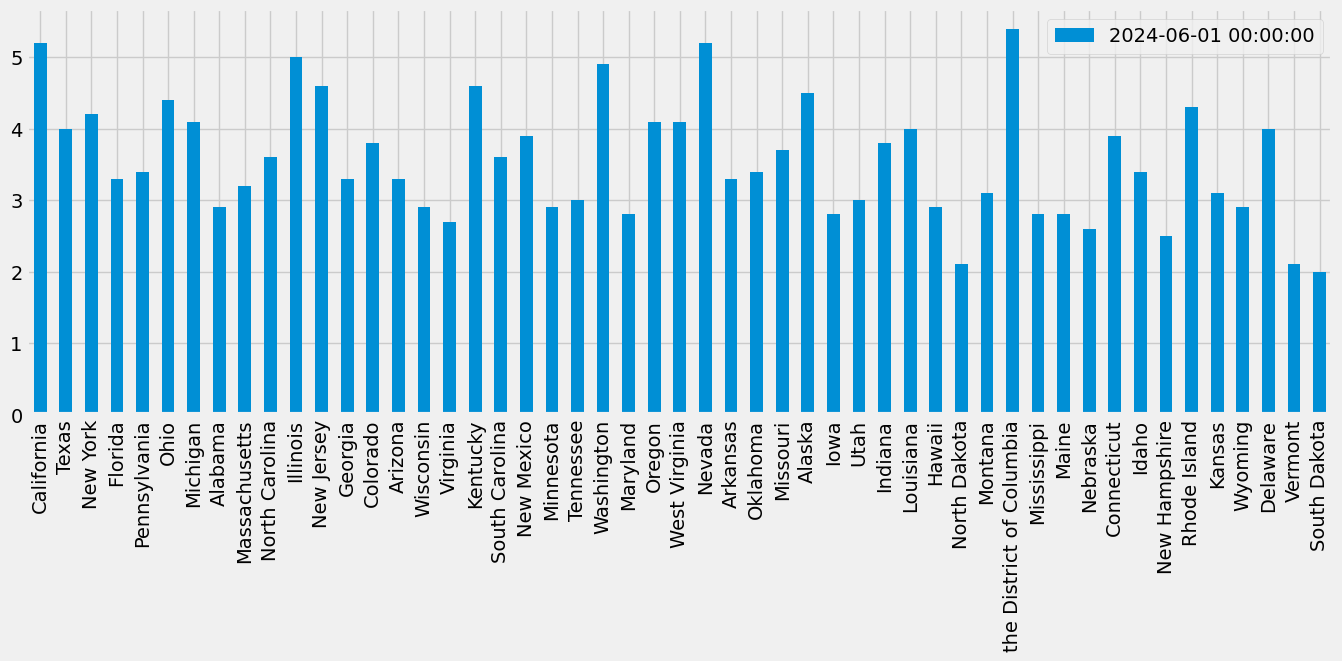

In [68]:
unemployment_state.loc[unemployment_state.index == '2024-06-01'].T.plot(kind='bar',figsize=(15,5))

<Axes: >

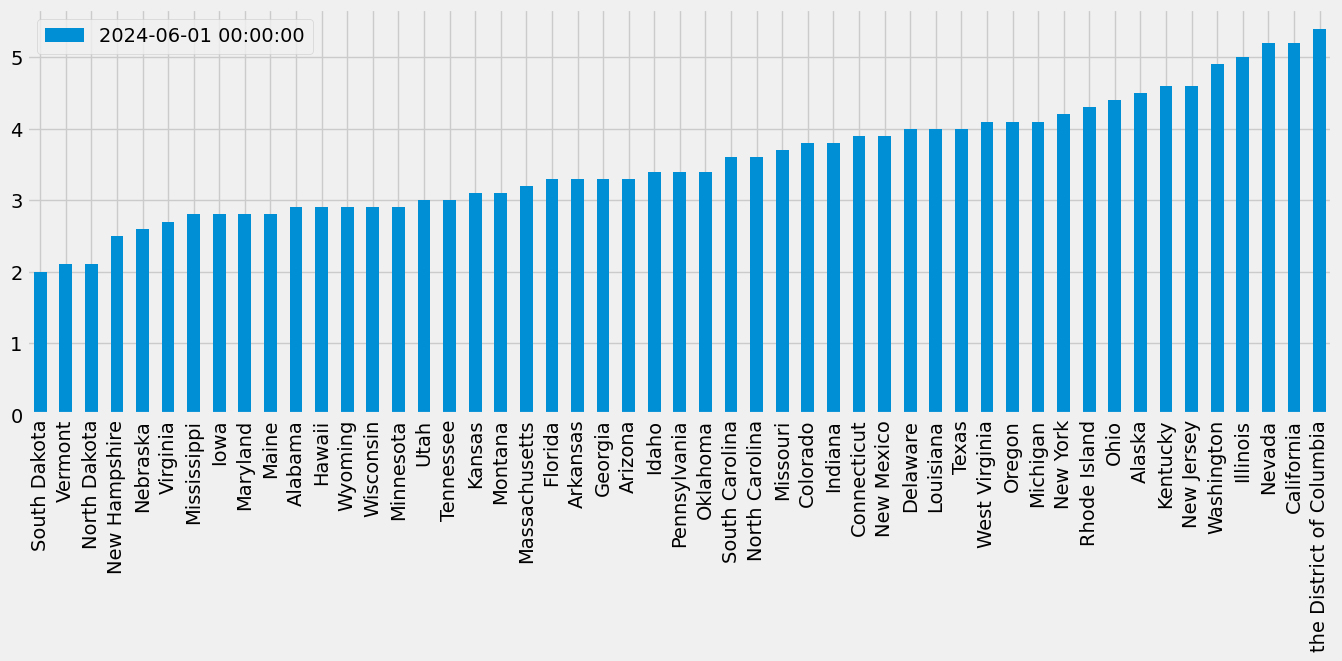

In [69]:
unemployment_state.loc[unemployment_state.index == '2024-06-01'].T.sort_values('2024-06-01').plot(kind='bar',figsize=(15,5))

## Plotting horizontaly

<Axes: >

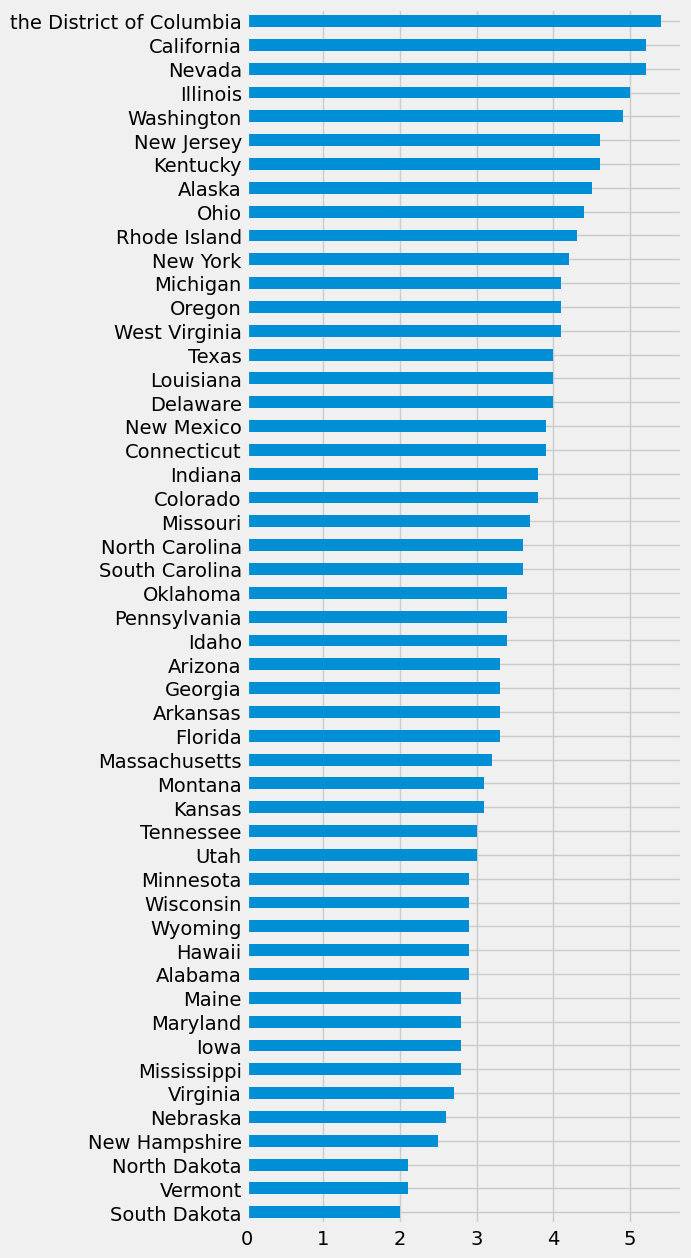

In [74]:
unemployment_state.loc[unemployment_state.index == '2024-06-01'].T.sort_values('2024-06-01').plot(kind='barh',figsize=(5,15),legend='')

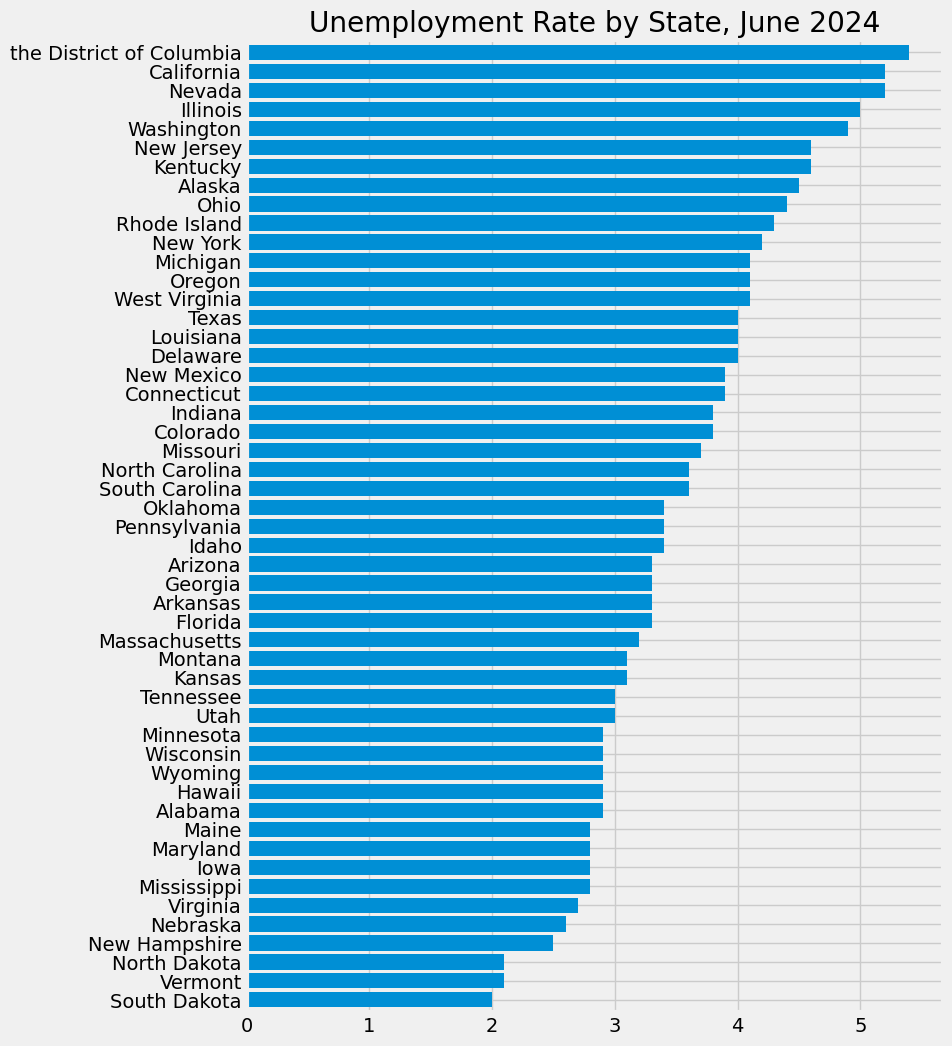

In [77]:
ax = unemployment_state.loc[unemployment_state.index == '2024-06-01'].T \
    .sort_values('2024-06-01') \
    .plot(kind='barh',figsize=(8,12), width = 0.8,
        title = "Unemployment Rate by State, June 2024")
ax.legend().remove()
plt.show()

## We'll do the same thing for the participation rate

In [110]:
participation_df = fred.search('participation rate state',filter=('frequency','Monthly'))

In [111]:
participation_df

id realtime_start realtime_end  \
series id                                                                    
T10YIEM                                T10YIEM     2024-08-13   2024-08-13   
CIVPART                                CIVPART     2024-08-13   2024-08-13   
LNU01300000                        LNU01300000     2024-08-13   2024-08-13   
T5YIEM                                  T5YIEM     2024-08-13   2024-08-13   
LNS11300060                        LNS11300060     2024-08-13   2024-08-13   
...                                        ...            ...          ...   
SMU42165400000000001SA  SMU42165400000000001SA     2024-08-13   2024-08-13   
SMU37351000000000001SA  SMU37351000000000001SA     2024-08-13   2024-08-13   
SMU51444200000000001SA  SMU51444200000000001SA     2024-08-13   2024-08-13   
SMU12427000000000001SA  SMU12427000000000001SA     2024-08-13   2024-08-13   
SMU36205240000000001SA  SMU36205240000000001SA     2024-08-13   2024-08-13   

                                                                    title  \
series id                                                                   
T10YIEM                                  10-Year Breakeven Inflation Rate   
CIVPART                                    Labor Force Participation Rate   
LNU01300000                                Labor Force Participation Rate   
T5YIEM                                    5-Year Breakeven Inflation Rate   
LNS11300060                   Labor Force Participation Rate - 25-54 Yrs.   
...                                                                   ...   
SMU42165400000000001SA  All Employees: Total Nonfarm in Chambersburg-W...   
SMU37351000000000001SA  All Employees: Total Nonfarm in New Bern, NC (...   
SMU51444200000000001SA  All Employees: Total Nonfarm in Staunton-Wayne...   
SMU12427000000000001SA  All Employees: Total Nonfarm in Sebring, FL (MSA)   
SMU36205240000000001SA  All Employees: Total Nonfarm in Dutchess Count...   

                       observation_start observation_end frequency  \
series id                                                            
T10YIEM                       2003-01-01      2024-07-01   Monthly   
CIVPART                       1948-01-01      2024-07-01   Monthly   
LNU01300000                   1948-01-01      2024-07-01   Monthly   
T5YIEM                        2003-01-01      2024-07-01   Monthly   
LNS11300060                   1948-01-01      2024-07-01   Monthly   
...                                  ...             ...       ...   
SMU42165400000000001SA        1990-01-01      2024-06-01   Monthly   
SMU37351000000000001SA        1990-01-01      2024-06-01   Monthly   
SMU51444200000000001SA        1990-01-01      2024-06-01   Monthly   
SMU12427000000000001SA        1990-01-01      2024-06-01   Monthly   
SMU36205240000000001SA        1990-01-01      2024-06-01   Monthly   

                       frequency_short                 units  \
series id                                                      
T10YIEM                              M               Percent   
CIVPART                              M               Percent   
LNU01300000                          M               Percent   
T5YIEM                               M               Percent   
LNS11300060                          M               Percent   
...                                ...                   ...   
SMU42165400000000001SA               M  Thousands of Persons   
SMU37351000000000001SA               M  Thousands of Persons   
SMU51444200000000001SA               M  Thousands of Persons   
SMU12427000000000001SA               M  Thousands of Persons   
SMU36205240000000001SA               M  Thousands of Persons   

                              units_short      seasonal_adjustment  \
series id                                                            
T10YIEM                                 %  Not Seasonally Adjusted   
CIVPART                                 %      Seasonally Adjusted   
LNU

In [112]:
participation_df.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2024-08-13   2024-08-13   
LNS11300060          LNS11300060     2024-08-13   2024-08-13   
LNS11300002          LNS11300002     2024-08-13   2024-08-13   
LNS11300001          LNS11300001     2024-08-13   2024-08-13   
LNS11324230          LNS11324230     2024-08-13   2024-08-13   
...                          ...            ...          ...   
LRIN74MAUSM156S  LRIN74MAUSM156S     2024-08-13   2024-08-13   
LRIN64MAUSM156S  LRIN64MAUSM156S     2024-08-13   2024-08-13   
LRIN64FEUSM156S  LRIN64FEUSM156S     2024-08-13   2024-08-13   
LRIN55FEUSM156S  LRIN55FEUSM156S     2024-08-13   2024-08-13   
LRIN25FEUSM156S  LRIN25FEUSM156S     2024-08-13   2024-08-13   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
...                                                            ...   
LRIN74MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN64FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN55FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LRIN25FEUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2024-07-01   Monthly               M   
LNS11300060            1948-01-01      2024-07-01   Monthly               M   
LNS11300002            1948-01-01      2024-07-01   Monthly               M   
LNS11300001            1948-01-01      2024-07-01   Monthly               M   
LNS11324230            1948-01-01      2024-07-01   Monthly               M   
...                           ...             ...       ...             ...   
LRIN74MAUSM156S        1981-01-01      2024-06-01   Monthly               M   
LRIN64MAUSM156S        1977-01-01      2024-06-01   Monthly               M   
LRIN64FEUSM156S        1977-01-01      2024-06-01   Monthly               M   
LRIN55FEUSM156S        1977-01-01      2024-06-01   Monthly               M   
LRIN25FEUSM156S        1977-01-01      2024-06-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
CIVPART          Percent           %  Seasonally Adjusted   
LNS11300060      Percent           %  Seasonally Adjusted   
LNS11300002      Percent           %  Seasonally Adjusted   
LNS11300001      Percent           %  Seasonally Adjusted   
LNS11324230      Percent           %  Seasonally Adjusted   
...                  ...         ...                  ...   
LRIN74MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN64FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN55FEUSM156S  Percent           %  Seasonally Adjusted   
LRIN25FEUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
CIVPART                                SA 2024-08-02 07:47:01-05:00   
LNS11300060                            SA 2024-08-02 07:47:02-05:00   
LNS11300002                            SA 2024-08-02 07:47:03-05:00   
LNS11300001                            SA 2024-08-02 07:47:03-05:00   
LNS11324230                           

In [113]:
participation_df = participation_df.query('seasonal_adjustment == "Seasonally Adjusted" & units == "Percent"')

## Check the shape to make sure if we have more data than 50 states

In [114]:
participation_df.shape

(109, 15)

## If we look at the title column only the state data contain this "Labor Force Participation Rate for " phrase

In [115]:
participation_df.sample(10)

id realtime_start realtime_end  \
series id                                                      
LRAC24MAUSM156S  LRAC24MAUSM156S     2024-08-13   2024-08-13   
LRIN24MAUSM156S  LRIN24MAUSM156S     2024-08-13   2024-08-13   
LBSSA11                  LBSSA11     2024-08-13   2024-08-13   
LBSSA29                  LBSSA29     2024-08-13   2024-08-13   
LBSSA05                  LBSSA05     2024-08-13   2024-08-13   
LBSSA47                  LBSSA47     2024-08-13   2024-08-13   
LBSSA26                  LBSSA26     2024-08-13   2024-08-13   
LBSSA06                  LBSSA06     2024-08-13   2024-08-13   
LBSSA37                  LBSSA37     2024-08-13   2024-08-13   
LRAC64MAUSM156S  LRAC64MAUSM156S     2024-08-13   2024-08-13   

                                                             title  \
series id                                                            
LRAC24MAUSM156S  Infra-Annual Labor Statistics: Labor Force Par...   
LRIN24MAUSM156S  Infra-Annual Labor Statistics: Inactivity Rate...   
LBSSA11          Labor Force Participation Rate for District Of...   
LBSSA29                Labor Force Participation Rate for Missouri   
LBSSA05                Labor Force Participation Rate for Arkansas   
LBSSA47               Labor Force Participation Rate for Tennessee   
LBSSA26                Labor Force Participation Rate for Michigan   
LBSSA06              Labor Force Participation Rate for California   
LBSSA37          Labor Force Participation Rate for North Carolina   
LRAC64MAUSM156S  Infra-Annual Labor Statistics: Labor Force Par...   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
LRAC24MAUSM156S        1955-01-01      2024-06-01   Monthly               M   
LRIN24MAUSM156S        1977-01-01      2024-06-01   Monthly               M   
LBSSA11                1976-01-01      2024-06-01   Monthly               M   
LBSSA29                1976-01-01      2024-06-01   Monthly               M   
LBSSA05                1976-01-01      2024-06-01   Monthly               M   
LBSSA47                1976-01-01      2024-06-01   Monthly               M   
LBSSA26                1976-01-01      2024-06-01   Monthly               M   
LBSSA06                1976-01-01      2024-06-01   Monthly               M   
LBSSA37                1976-01-01      2024-06-01   Monthly               M   
LRAC64MAUSM156S        1977-01-01      2024-06-01   Monthly               M   

                   units units_short  seasonal_adjustment  \
series id                                                   
LRAC24MAUSM156S  Percent           %  Seasonally Adjusted   
LRIN24MAUSM156S  Percent           %  Seasonally Adjusted   
LBSSA11          Percent           %  Seasonally Adjusted   
LBSSA29          Percent           %  Seasonally Adjusted   
LBSSA05          Percent           %  Seasonally Adjusted   
LBSSA47          Percent           %  Seasonally Adjusted   
LBSSA26          Percent           %  Seasonally Adjusted   
LBSSA06          Percent           %  Seasonally Adjusted   
LBSSA37          Percent           %  Seasonally Adjusted   
LRAC64MAUSM156S  Percent           %  Seasonally Adjusted   

                seasonal_adjustment_short              last_updated  \
series id                                                             
LRAC24MAUSM156S                        SA 2024-07-15 13:55:45-05:00   
LRIN24MAUSM156S                        SA 2024-07-15 13:55:00-05:00   
LBSSA11                                SA 2024-07-19 09:01:19-05:00   
LBSSA29                                SA 2024-07-19 09:01:08-05:00   
LBSSA05                                SA 2024-07-19 09:01:14-05:00   
LBSSA47                                SA 2024-07-19 09:01:05-05:00   
LBSSA26                                SA 2024-07-19 09:01:02-05:00   
LBSSA06                                SA 2024-07-19 09:01:03-05:00   
LBSSA37                     

## To get the data that only belongs to all the states

In [116]:
participation_df['title'].str.contains('Labor Force Participation Rate for ')

series id
CIVPART            False
LNS11300060        False
LNS11300002        False
LNS11300001        False
LNS11324230        False
                   ...  
LRIN74MAUSM156S    False
LRIN64MAUSM156S    False
LRIN64FEUSM156S    False
LRIN55FEUSM156S    False
LRIN25FEUSM156S    False
Name: title, Length: 109, dtype: bool

In [117]:
participation_df.loc[participation_df['title'].str.contains('Labor Force Participation Rate for ')]

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-08-13   2024-08-13   
LBSSA01    LBSSA01     2024-08-13   2024-08-13   
LBSSA36    LBSSA36     2024-08-13   2024-08-13   
LBSSA26    LBSSA26     2024-08-13   2024-08-13   
LBSSA28    LBSSA28     2024-08-13   2024-08-13   
LBSSA48    LBSSA48     2024-08-13   2024-08-13   
LBSSA12    LBSSA12     2024-08-13   2024-08-13   
LBSSA21    LBSSA21     2024-08-13   2024-08-13   
LBSSA39    LBSSA39     2024-08-13   2024-08-13   
LBSSA55    LBSSA55     2024-08-13   2024-08-13   
LBSSA42    LBSSA42     2024-08-13   2024-08-13   
LBSSA25    LBSSA25     2024-08-13   2024-08-13   
LBSSA27    LBSSA27     2024-08-13   2024-08-13   
LBSSA24    LBSSA24     2024-08-13   2024-08-13   
LBSSA54    LBSSA54     2024-08-13   2024-08-13   
LBSSA47    LBSSA47     2024-08-13   2024-08-13   
LBSSA23    LBSSA23     2024-08-13   2024-08-13   
LBSSA17    LBSSA17     2024-08-13   2024-08-13   
LBSSA37    LBSSA37     2024-08-13   2024-08-13   
LBSSA13    LBSSA13     2024-08-13   2024-08-13   
LBSSA22    LBSSA22     2024-08-13   2024-08-13   
LBSSA45    LBSSA45     2024-08-13   2024-08-13   
LBSSA08    LBSSA08     2024-08-13   2024-08-13   
LBSSA49    LBSSA49     2024-08-13   2024-08-13   
LBSSA51    LBSSA51     2024-08-13   2024-08-13   
LBSSA18    LBSSA18     2024-08-13   2024-08-13   
LBSSA29    LBSSA29     2024-08-13   2024-08-13   
LBSSA34    LBSSA34     2024-08-13   2024-08-13   
LBSSA19    LBSSA19     2024-08-13   2024-08-13   
LBSSA02    LBSSA02     2024-08-13   2024-08-13   
LBSSA53    LBSSA53     2024-08-13   2024-08-13   
LBSSA04    LBSSA04     2024-08-13   2024-08-13   
LBSSA35    LBSSA35     2024-08-13   2024-08-13   
LBSSA16    LBSSA16     2024-08-13   2024-08-13   
LBSSA05    LBSSA05     2024-08-13   2024-08-13   
LBSSA40    LBSSA40     2024-08-13   2024-08-13   
LBSSA31    LBSSA31     2024-08-13   2024-08-13   
LBSSA15    LBSSA15     2024-08-13   2024-08-13   
LBSSA32    LBSSA32     2024-08-13   2024-08-13   
LBSSA30    LBSSA30     2024-08-13   2024-08-13   
LBSSA41    LBSSA41     2024-08-13   2024-08-13   
LBSSA33    LBSSA33     2024-08-13   2024-08-13   
LBSSA50    LBSSA50     2024-08-13   2024-08-13   
LBSSA09    LBSSA09     2024-08-13   2024-08-13   
LBSSA38    LBSSA38     2024-08-13   2024-08-13   
LBSSA46    LBSSA46     2024-08-13   2024-08-13   
LBSSA20    LBSSA20     2024-08-13   2024-08-13   
LBSSA44    LBSSA44     2024-08-13   2024-08-13   
LBSSA11    LBSSA11     2024-08-13   2024-08-13   
LBSSA10    LBSSA10     2024-08-13   2024-08-13   
LBSSA56    LBSSA56     2024-08-13   2024-08-13   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

In [118]:
participation_df = participation_df.loc[participation_df['title'].str.contains('Labor Force Participation Rate for ')]

## Now if we check the shape, we can see it's only belongs to all the states

In [100]:
participation_df.shape

(51, 15)

## Now we'll change the 'id' to state names, to do that let's create a series with only sates names

In [119]:
participation_df['title'].str.replace('Labor Force Participation Rate for ','')

series id
LBSSA06              California
LBSSA01                 Alabama
LBSSA36                New York
LBSSA26                Michigan
LBSSA28             Mississippi
LBSSA48                   Texas
LBSSA12                 Florida
LBSSA21                Kentucky
LBSSA39                    Ohio
LBSSA55               Wisconsin
LBSSA42            Pennsylvania
LBSSA25           Massachusetts
LBSSA27               Minnesota
LBSSA24                Maryland
LBSSA54           West Virginia
LBSSA47               Tennessee
LBSSA23                   Maine
LBSSA17                Illinois
LBSSA37          North Carolina
LBSSA13                 Georgia
LBSSA22               Louisiana
LBSSA45          South Carolina
LBSSA08                Colorado
LBSSA49                    Utah
LBSSA51                Virginia
LBSSA18                 Indiana
LBSSA29                Missouri
LBSSA34              New Jersey
LBSSA19                    Iowa
LBSSA02                  Alaska
LBSSA53              Washingto

## Now replace this series with a new created column called 'state' in the dataframe, In unemploment dataframe we used a different method to handle this issue, we created a dictionary to map the states names

In [122]:
participation_df['state'] = participation_df['title'].str.replace('Labor Force Participation Rate for ','')

In [126]:
participation_df

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-08-13   2024-08-13   
LBSSA01    LBSSA01     2024-08-13   2024-08-13   
LBSSA36    LBSSA36     2024-08-13   2024-08-13   
LBSSA26    LBSSA26     2024-08-13   2024-08-13   
LBSSA28    LBSSA28     2024-08-13   2024-08-13   
LBSSA48    LBSSA48     2024-08-13   2024-08-13   
LBSSA12    LBSSA12     2024-08-13   2024-08-13   
LBSSA21    LBSSA21     2024-08-13   2024-08-13   
LBSSA39    LBSSA39     2024-08-13   2024-08-13   
LBSSA55    LBSSA55     2024-08-13   2024-08-13   
LBSSA42    LBSSA42     2024-08-13   2024-08-13   
LBSSA25    LBSSA25     2024-08-13   2024-08-13   
LBSSA27    LBSSA27     2024-08-13   2024-08-13   
LBSSA24    LBSSA24     2024-08-13   2024-08-13   
LBSSA54    LBSSA54     2024-08-13   2024-08-13   
LBSSA47    LBSSA47     2024-08-13   2024-08-13   
LBSSA23    LBSSA23     2024-08-13   2024-08-13   
LBSSA17    LBSSA17     2024-08-13   2024-08-13   
LBSSA37    LBSSA37     2024-08-13   2024-08-13   
LBSSA13    LBSSA13     2024-08-13   2024-08-13   
LBSSA22    LBSSA22     2024-08-13   2024-08-13   
LBSSA45    LBSSA45     2024-08-13   2024-08-13   
LBSSA08    LBSSA08     2024-08-13   2024-08-13   
LBSSA49    LBSSA49     2024-08-13   2024-08-13   
LBSSA51    LBSSA51     2024-08-13   2024-08-13   
LBSSA18    LBSSA18     2024-08-13   2024-08-13   
LBSSA29    LBSSA29     2024-08-13   2024-08-13   
LBSSA34    LBSSA34     2024-08-13   2024-08-13   
LBSSA19    LBSSA19     2024-08-13   2024-08-13   
LBSSA02    LBSSA02     2024-08-13   2024-08-13   
LBSSA53    LBSSA53     2024-08-13   2024-08-13   
LBSSA04    LBSSA04     2024-08-13   2024-08-13   
LBSSA35    LBSSA35     2024-08-13   2024-08-13   
LBSSA16    LBSSA16     2024-08-13   2024-08-13   
LBSSA05    LBSSA05     2024-08-13   2024-08-13   
LBSSA40    LBSSA40     2024-08-13   2024-08-13   
LBSSA31    LBSSA31     2024-08-13   2024-08-13   
LBSSA15    LBSSA15     2024-08-13   2024-08-13   
LBSSA32    LBSSA32     2024-08-13   2024-08-13   
LBSSA30    LBSSA30     2024-08-13   2024-08-13   
LBSSA41    LBSSA41     2024-08-13   2024-08-13   
LBSSA33    LBSSA33     2024-08-13   2024-08-13   
LBSSA50    LBSSA50     2024-08-13   2024-08-13   
LBSSA09    LBSSA09     2024-08-13   2024-08-13   
LBSSA38    LBSSA38     2024-08-13   2024-08-13   
LBSSA46    LBSSA46     2024-08-13   2024-08-13   
LBSSA20    LBSSA20     2024-08-13   2024-08-13   
LBSSA44    LBSSA44     2024-08-13   2024-08-13   
LBSSA11    LBSSA11     2024-08-13   2024-08-13   
LBSSA10    LBSSA10     2024-08-13   2024-08-13   
LBSSA56    LBSSA56     2024-08-13   2024-08-13   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA28       Labor Force Participation Rate for Mississippi   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA54     Labor Force Participation Rate for West Virginia   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA17          Labor Force Participation Rate for Illinois   
LBSSA37    Labor Force Participation Rate for North Carolina   
LBSSA13           Lab

## Now let's collec the data from fred state id wise

In [127]:
part_results = []

for i in participation_df.index:
    results = fred.get_series(i)
    results = results.to_frame(name=i)
    part_results.append(results)
participation_state = pd.concat(part_results,axis=1)

In [128]:
participation_state

LBSSA06  LBSSA01  LBSSA36  LBSSA26  LBSSA28  LBSSA48  LBSSA12  \
1976-01-01     62.6     57.0     58.0     61.6     58.8     63.8     55.8   
1976-02-01     62.4     56.9     58.0     61.5     58.6     63.5     55.7   
1976-03-01     62.2     56.8     58.0     61.5     58.5     63.4     55.5   
1976-04-01     62.2     56.8     58.0     61.6     58.5     63.5     55.5   
1976-05-01     62.3     56.8     58.1     61.7     58.5     63.6     55.4   
...             ...      ...      ...      ...      ...      ...      ...   
2024-02-01     62.1     57.4     61.4     62.2     53.7     64.1     59.4   
2024-03-01     62.0     57.4     61.4     62.3     53.7     64.1     59.4   
2024-04-01     62.0     57.5     61.3     62.3     53.7     64.2     59.3   
2024-05-01     62.0     57.5     61.3     62.3     53.8     64.2     59.1   
2024-06-01     62.0     57.5     61.3     62.3     54.0     64.3     58.9   

            LBSSA21  LBSSA39  LBSSA55  ...  LBSSA33  LBSSA50  LBSSA09  \
1976-01-01     60.5     61.7     65.6  ...     65.9     63.6     64.2   
1976-02-01     60.3     61.7     65.5  ...     65.6     63.4     64.1   
1976-03-01     60.2     61.7     65.4  ...     65.6     63.2     64.0   
1976-04-01     60.1     61.6     65.4  ...     65.7     63.5     64.1   
1976-05-01     60.1     61.6     65.5  ...     66.0     63.6     64.3   
...             ...      ...      ...  ...      ...      ...      ...   
2024-02-01     56.9     61.8     65.7  ...     65.2     65.3     64.5   
2024-03-01     56.9     61.8     65.6  ...     65.3     65.4     64.6   
2024-04-01     57.1     61.8     65.6  ...     65.5     65.5     64.6   
2024-05-01     57.3     61.9     65.6  ...     65.6     65.6     64.7   
2024-06-01     57.4     62.1     65.5  ...     65.6     65.7     64.6   

            LBSSA38  LBSSA46  LBSSA20  LBSSA44  LBSSA11  LBSSA10  LBSSA56  
1976-01-01     62.6     64.6     65.1     63.8     64.4     62.7     65.3  
1976-02-01     62.4     64.4     65.0     63.7     64.5     62.5     64.9  
1976-03-01     62.3     64.4     64.9     63.6     64.5     62.5     64.7  
1976-04-01     62.5     64.3     65.0     63.7     64.5     62.4     64.9  
1976-05-01     62.6     64.3     65.1     63.6     64.4     62.4     65.2  
...             ...      ...      ...      ...      ...      ...      ...  
2024-02-01     68.9     67.8     66.1     64.1     72.3     60.5     63.1  
2024-03-01     68.9     67.7     66.1     64.4     72.6     60.3     63.0  
2024-04-01     69.0     67.6     66.1     64.7     72.8     60.1     63.0  
2024-05-01     68.9     67.5     66.1     64.9     72.7     59.9     62.9  
2024-06-01     68.9     67.5     66.1     65.1     72.6     59.8     63.0  

[582 rows x 51 columns]

## Now to change the names of the columns with actual sate names, we'll use a list comprehention

In [132]:
participation_state.columns = [i for i in participation_df['state']]

In [133]:
participation_state

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   
...                ...      ...       ...       ...          ...    ...   
2024-02-01        62.1     57.4      61.4      62.2         53.7   64.1   
2024-03-01        62.0     57.4      61.4      62.3         53.7   64.1   
2024-04-01        62.0     57.5      61.3      62.3         53.7   64.2   
2024-05-01        62.0     57.5      61.3      62.3         53.8   64.2   
2024-06-01        62.0     57.5      61.3      62.3         54.0   64.3   

            Florida  Kentucky  Ohio  Wisconsin  ...  New Hampshire  Vermont  \
1976-01-01     55.8      60.5  61.7       65.6  ...           65.9     63.6   
1976-02-01     55.7      60.3  61.7       65.5  ...           65.6     63.4   
1976-03-01     55.5      60.2  61.7       65.4  ...           65.6     63.2   
1976-04-01     55.5      60.1  61.6       65.4  ...           65.7     63.5   
1976-05-01     55.4      60.1  61.6       65.5  ...           66.0     63.6   
...             ...       ...   ...        ...  ...            ...      ...   
2024-02-01     59.4      56.9  61.8       65.7  ...           65.2     65.3   
2024-03-01     59.4      56.9  61.8       65.6  ...           65.3     65.4   
2024-04-01     59.3      57.1  61.8       65.6  ...           65.5     65.5   
2024-05-01     59.1      57.3  61.9       65.6  ...           65.6     65.6   
2024-06-01     58.9      57.4  62.1       65.5  ...           65.6     65.7   

            Connecticut  North Dakota  South Dakota  Kansas  Rhode Island  \
1976-01-01         64.2          62.6          64.6    65.1          63.8   
1976-02-01         64.1          62.4          64.4    65.0          63.7   
1976-03-01         64.0          62.3          64.4    64.9          63.6   
1976-04-01         64.1          62.5          64.3    65.0          63.7   
1976-05-01         64.3          62.6          64.3    65.1          63.6   
...                 ...           ...           ...     ...           ...   
2024-02-01         64.5          68.9          67.8    66.1          64.1   
2024-03-01         64.6          68.9          67.7    66.1          64.4   
2024-04-01         64.6          69.0          67.6    66.1          64.7   
2024-05-01         64.7          68.9          67.5    66.1          64.9   
2024-06-01         64.6          68.9          67.5    66.1          65.1   

            District Of Columbia  Delaware  Wyoming  
1976-01-01                  64.4      62.7     65.3  
1976-02-01                  64.5      62.5     64.9  
1976-03-01                  64.5      62.5     64.7  
1976-04-01                  64.5      62.4     64.9  
1976-05-01                  64.4      62.4     65.2  
...                          ...       ...      ...  
2024-02-01                  72.3      60.5     63.1  
2024-03-01                  72.6      60.3     63.0  
2024-04-01                  72.8      60.1     63.0  
2024-05-01                  72.7      59.9     62.9  
2024-06-01                  72.6      59.8     63.0  

[582 rows x 51 columns]

## Let's check for missing values

In [135]:
participation_state.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 582 entries, 1976-01-01 to 2024-06-01
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   California            582 non-null    float64
 1   Alabama               582 non-null    float64
 2   New York              582 non-null    float64
 3   Michigan              582 non-null    float64
 4   Mississippi           582 non-null    float64
 5   Texas                 582 non-null    float64
 6   Florida               582 non-null    float64
 7   Kentucky              582 non-null    float64
 8   Ohio                  582 non-null    float64
 9   Wisconsin             582 non-null    float64
 10  Pennsylvania          582 non-null    float64
 11  Massachusetts         582 non-null    float64
 12  Minnesota             582 non-null    float64
 13  Maryland              582 non-null    float64
 14  West Virginia         582 non-null    float64
 15  Tenn

## So as we can see there's no missing values in our dataframe

In [141]:
participation_state.isna().sum()

California              0
Alabama                 0
New York                0
Michigan                0
Mississippi             0
Texas                   0
Florida                 0
Kentucky                0
Ohio                    0
Wisconsin               0
Pennsylvania            0
Massachusetts           0
Minnesota               0
Maryland                0
West Virginia           0
Tennessee               0
Maine                   0
Illinois                0
North Carolina          0
Georgia                 0
Louisiana               0
South Carolina          0
Colorado                0
Utah                    0
Virginia                0
Indiana                 0
Missouri                0
New Jersey              0
Iowa                    0
Alaska                  0
Washington              0
Arizona                 0
New Mexico              0
Idaho                   0
Arkansas                0
Oklahoma                0
Nebraska                0
Hawaii                  0
Nevada      

## Let's save the dataframe

In [147]:
participation_state.to_csv('participation_state.csv')

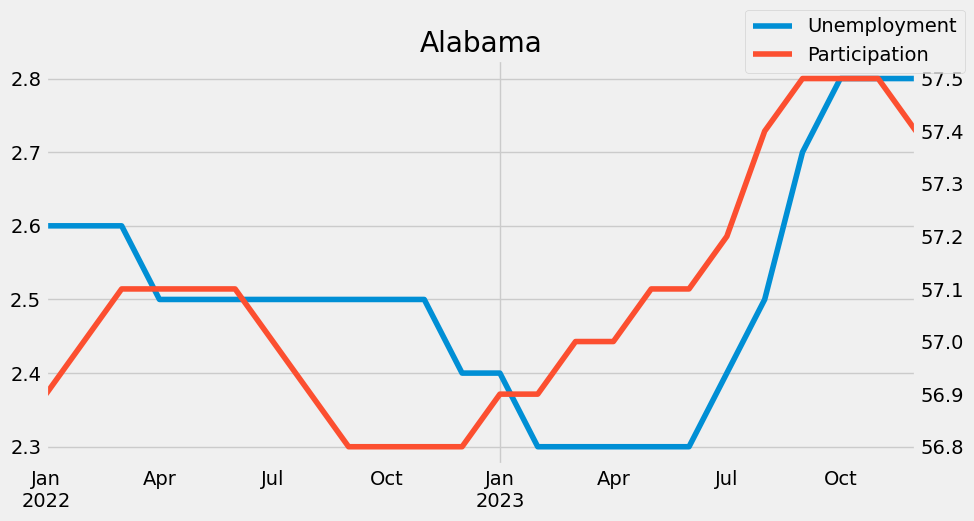

In [145]:
state = 'Alabama'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = unemployment_state.asfreq('MS')
l1 = uemp_states2.query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = participation_state.dropna().query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

KeyError: 'the District of Columbia'

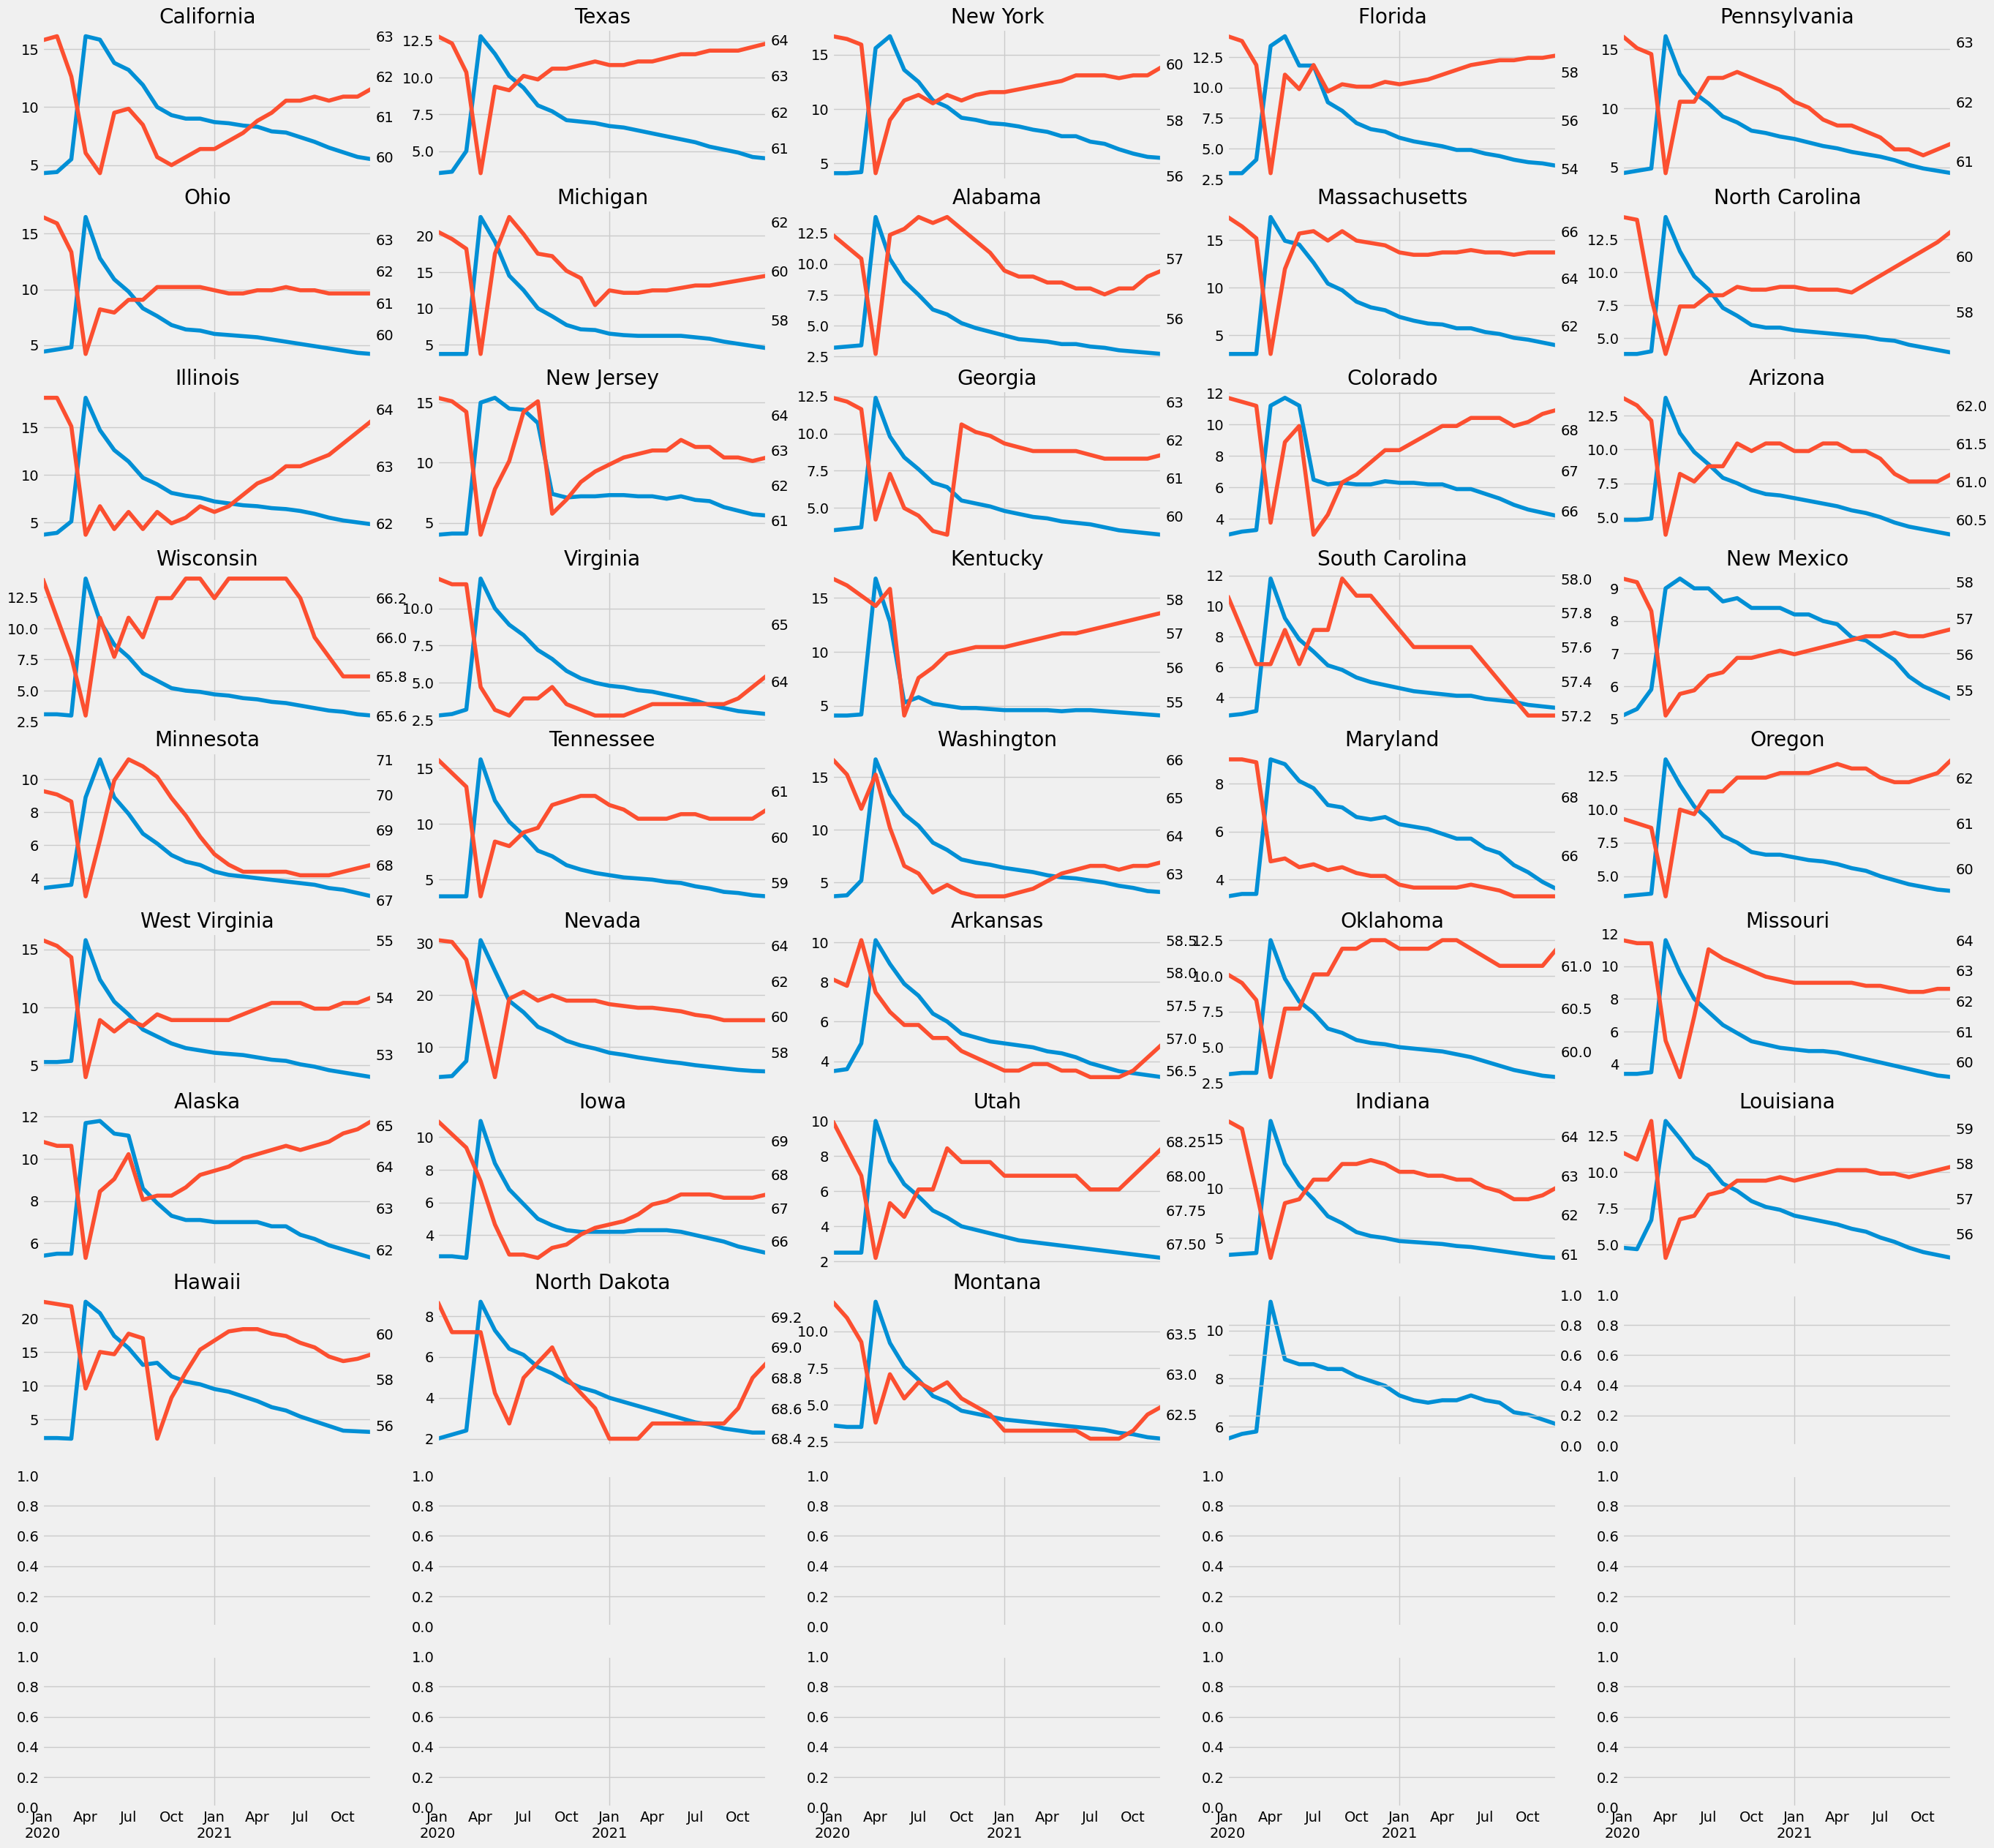

In [146]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_state.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemployment_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    participation_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

## The error looks like there's a name mismatch  of DC in out dataframes

In [148]:
unemployment_state.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana',
       'the District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [149]:
participation_state.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

## Let's keep the both name same

In [155]:
unemployment_state = unemployment_state.rename(columns={'the District of Columbia':'District Of Columbia'})

## Let's run it again

KeyError: 'District of Columbia'

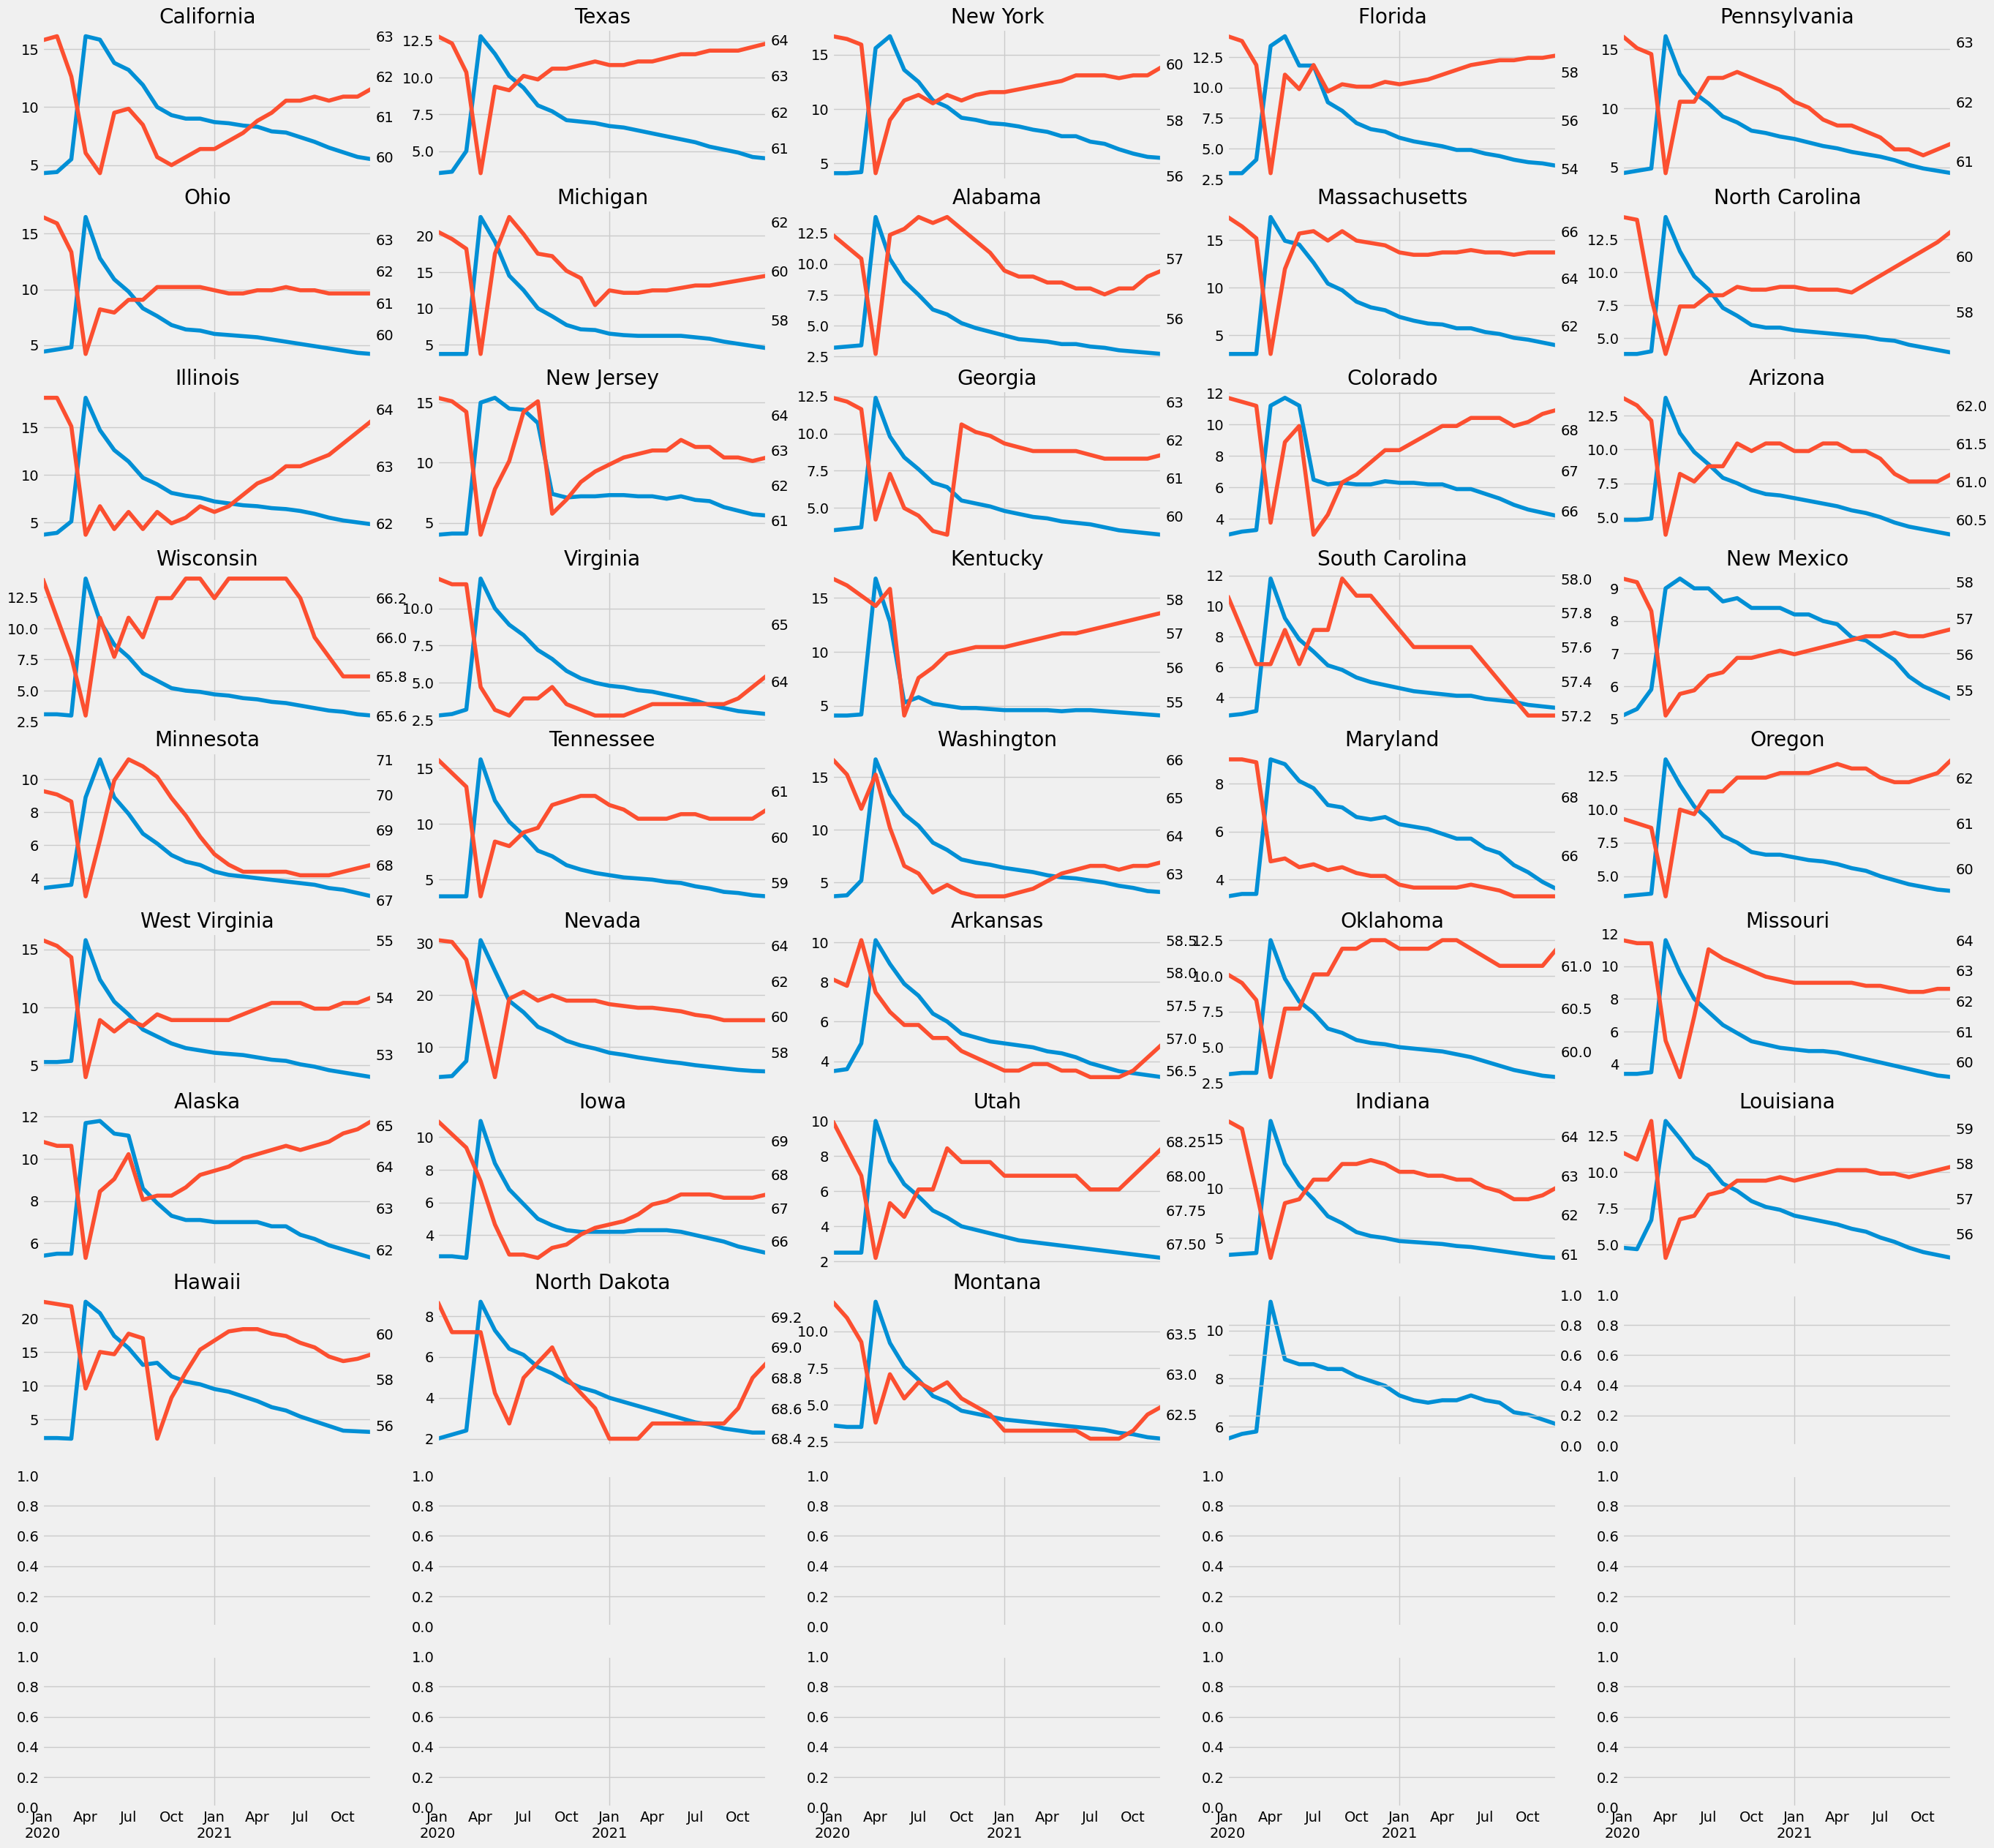

In [156]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_state.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemployment_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    participation_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

KeyError: 'District Of Columbia'

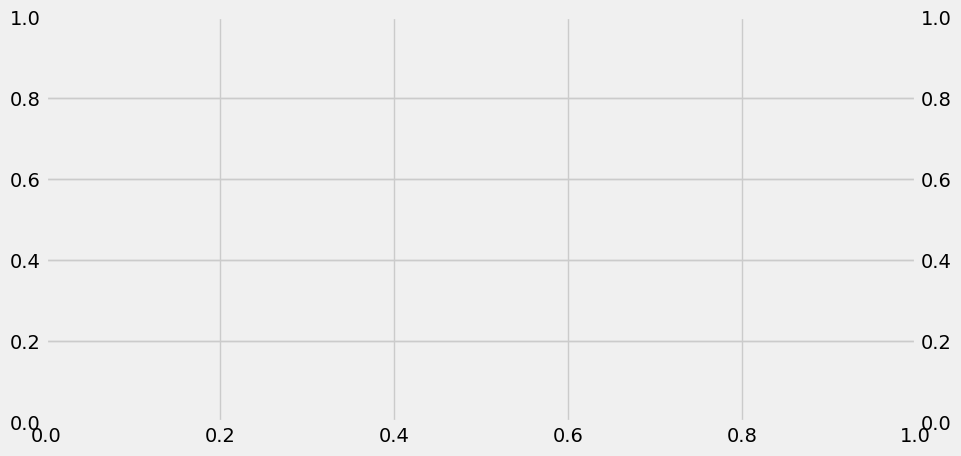

In [157]:
state = 'District Of Columbia'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = unemployment_state.asfreq('MS')
l1 = uemp_states2.query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = participation_state.dropna().query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

In [158]:
unemployment_state['District of Columbia']

1976-01-01    8.7
1976-02-01    8.7
1976-03-01    8.6
1976-04-01    8.5
1976-05-01    8.4
             ... 
2024-02-01    5.1
2024-03-01    5.2
2024-04-01    5.2
2024-05-01    5.3
2024-06-01    5.4
Name: District of Columbia, Length: 582, dtype: float64

In [159]:
unemployment_state.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana',
       'District of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

In [160]:
unemployment_state.rename(columns={'District of Columbia':'District Of Columbia'})

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   
...                ...    ...       ...      ...           ...   ...   
2024-02-01         5.3    3.9       4.4      3.1           3.4   3.7   
2024-03-01         5.3    3.9       4.3      3.2           3.4   3.8   
2024-04-01         5.3    4.0       4.2      3.3           3.4   4.0   
2024-05-01         5.2    4.0       4.2      3.3           3.4   4.2   
2024-06-01         5.2    4.0       4.2      3.3           3.4   4.4   

            Michigan  Alabama  Massachusetts  North Carolina  ...  Nebraska  \
1976-01-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-02-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-03-01       9.9      6.6           10.5             6.4  ...       3.3   
1976-04-01       9.8      6.5           10.3             6.3  ...       3.2   
1976-05-01       9.6      6.4           10.1             6.1  ...       3.1   
...              ...      ...            ...             ...  ...       ...   
2024-02-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-03-01       3.9      3.0            2.9             3.5  ...       2.5   
2024-04-01       3.9      3.1            2.9             3.5  ...       2.5   
2024-05-01       3.9      3.0            3.0             3.6  ...       2.5   
2024-06-01       4.1      2.9            3.2             3.6  ...       2.6   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   
...                 ...    ...            ...           ...     ...      ...   
2024-02-01          4.5    3.3            2.6           3.9     2.7      2.8   
2024-03-01          4.5    3.3            2.6           4.1     2.7      2.8   
2024-04-01          4.4    3.3            2.6           4.1     2.8      2.8   
2024-05-01          4.3    3.3            2.5           4.3     2.9      2.9   
2024-06-01          3.9    3.4            2.5           4.3     3.1      2.9   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6           3.3  
1976-02-01       8.0      8.6           3.3  
1976-03-01       8.0      8.6           3.2  
1976-04-01       8.1      8.6           3.1  
1976-05-01       8.3      8.5           3.1  
...              ...      ...           ...  
2024-02-01       4.0      2.3           2.1  
2024-03-01       3.9      2.2           2.1  
2024-04-01       3.9      2.1           2.0  
2024-05-01       3.9      2.1           2.0  
2024-06-01       4.0      2.1           2.0  

[582 rows x 51 columns]

In [161]:
unemployment_state = unemployment_state.rename(columns={'District of Columbia':'District Of Columbia'})

In [162]:
unemployment_state.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana',
       'District Of Columbia', 'Mississippi', 'Maine', 'Nebraska',
       'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island', 'Kansas',
       'Wyoming', 'Delaware', 'Vermont', 'South Dakota'],
      dtype='object')

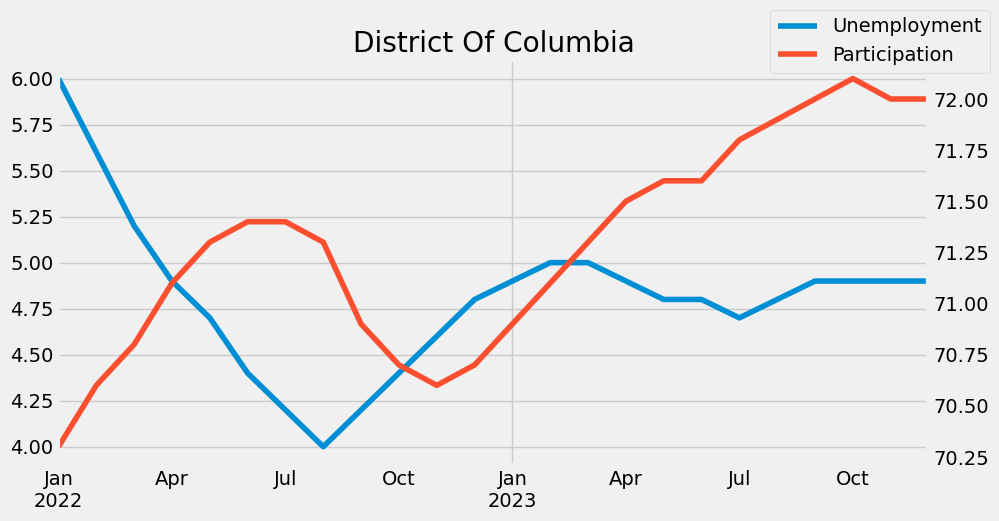

In [163]:
state = 'District Of Columbia'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = unemployment_state.asfreq('MS')
l1 = uemp_states2.query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = participation_state.dropna().query('index >= 2022 and index < 2024')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

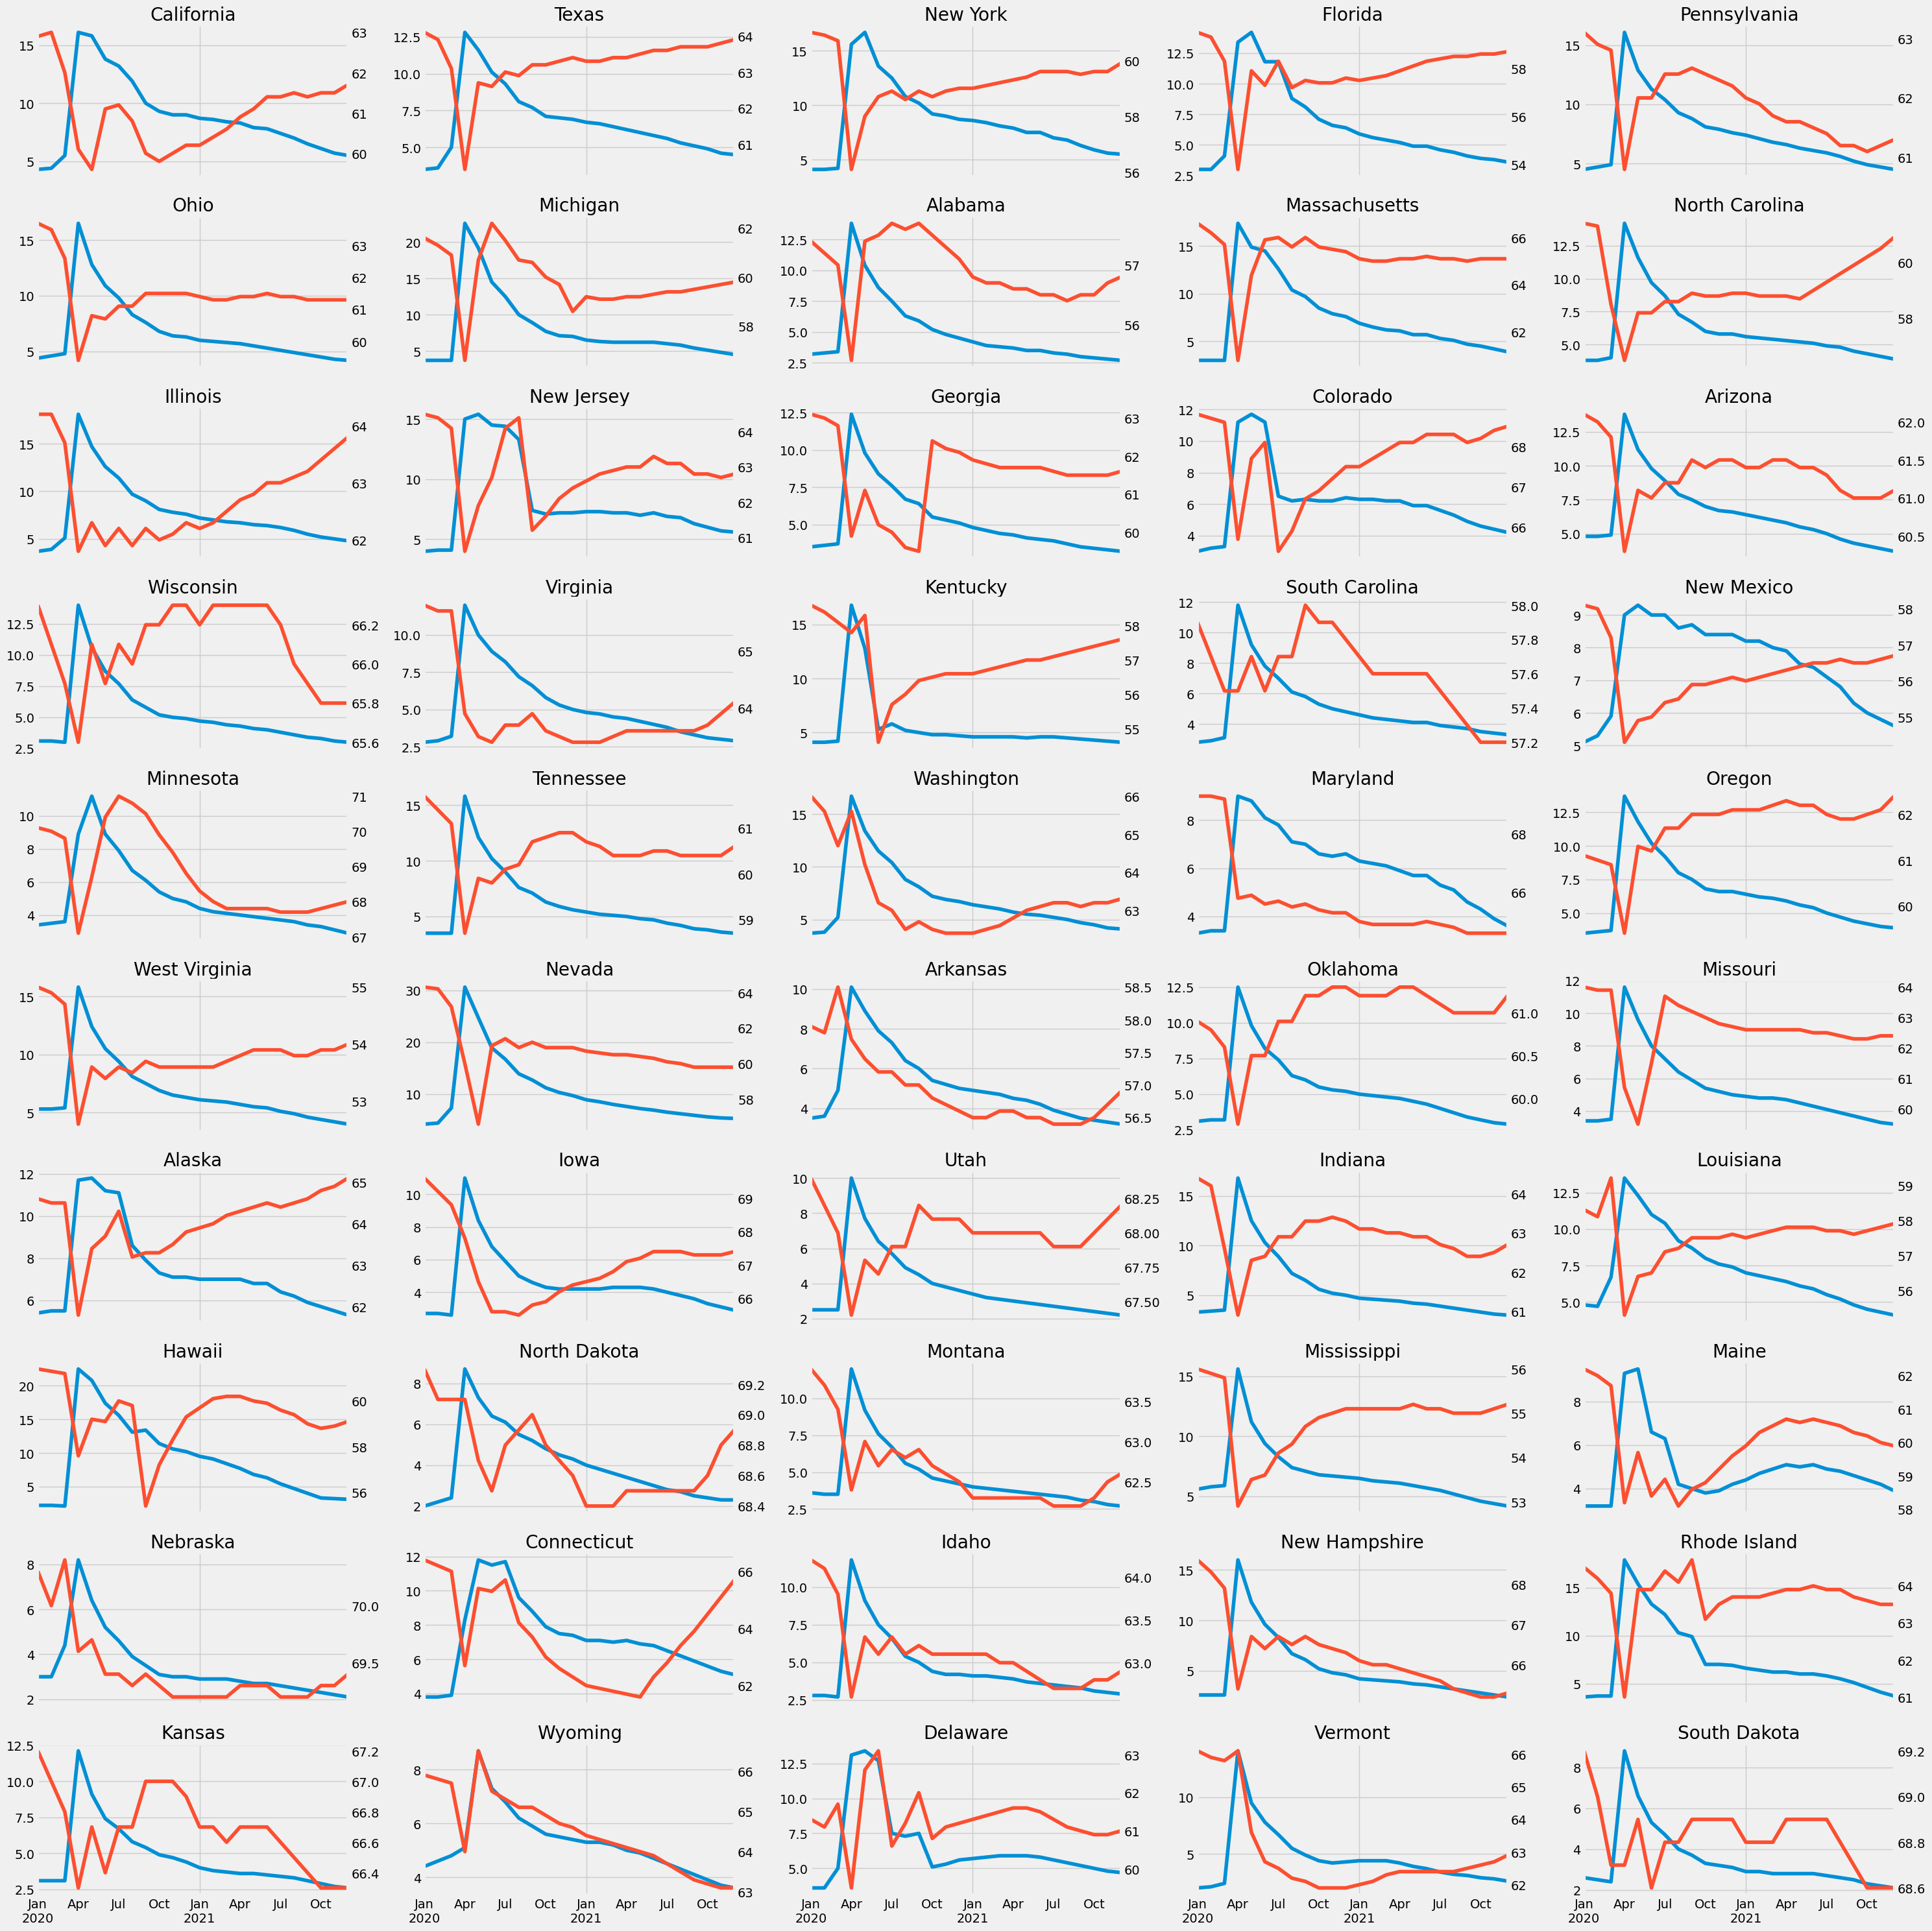

In [169]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_state.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    unemployment_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    participation_state.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

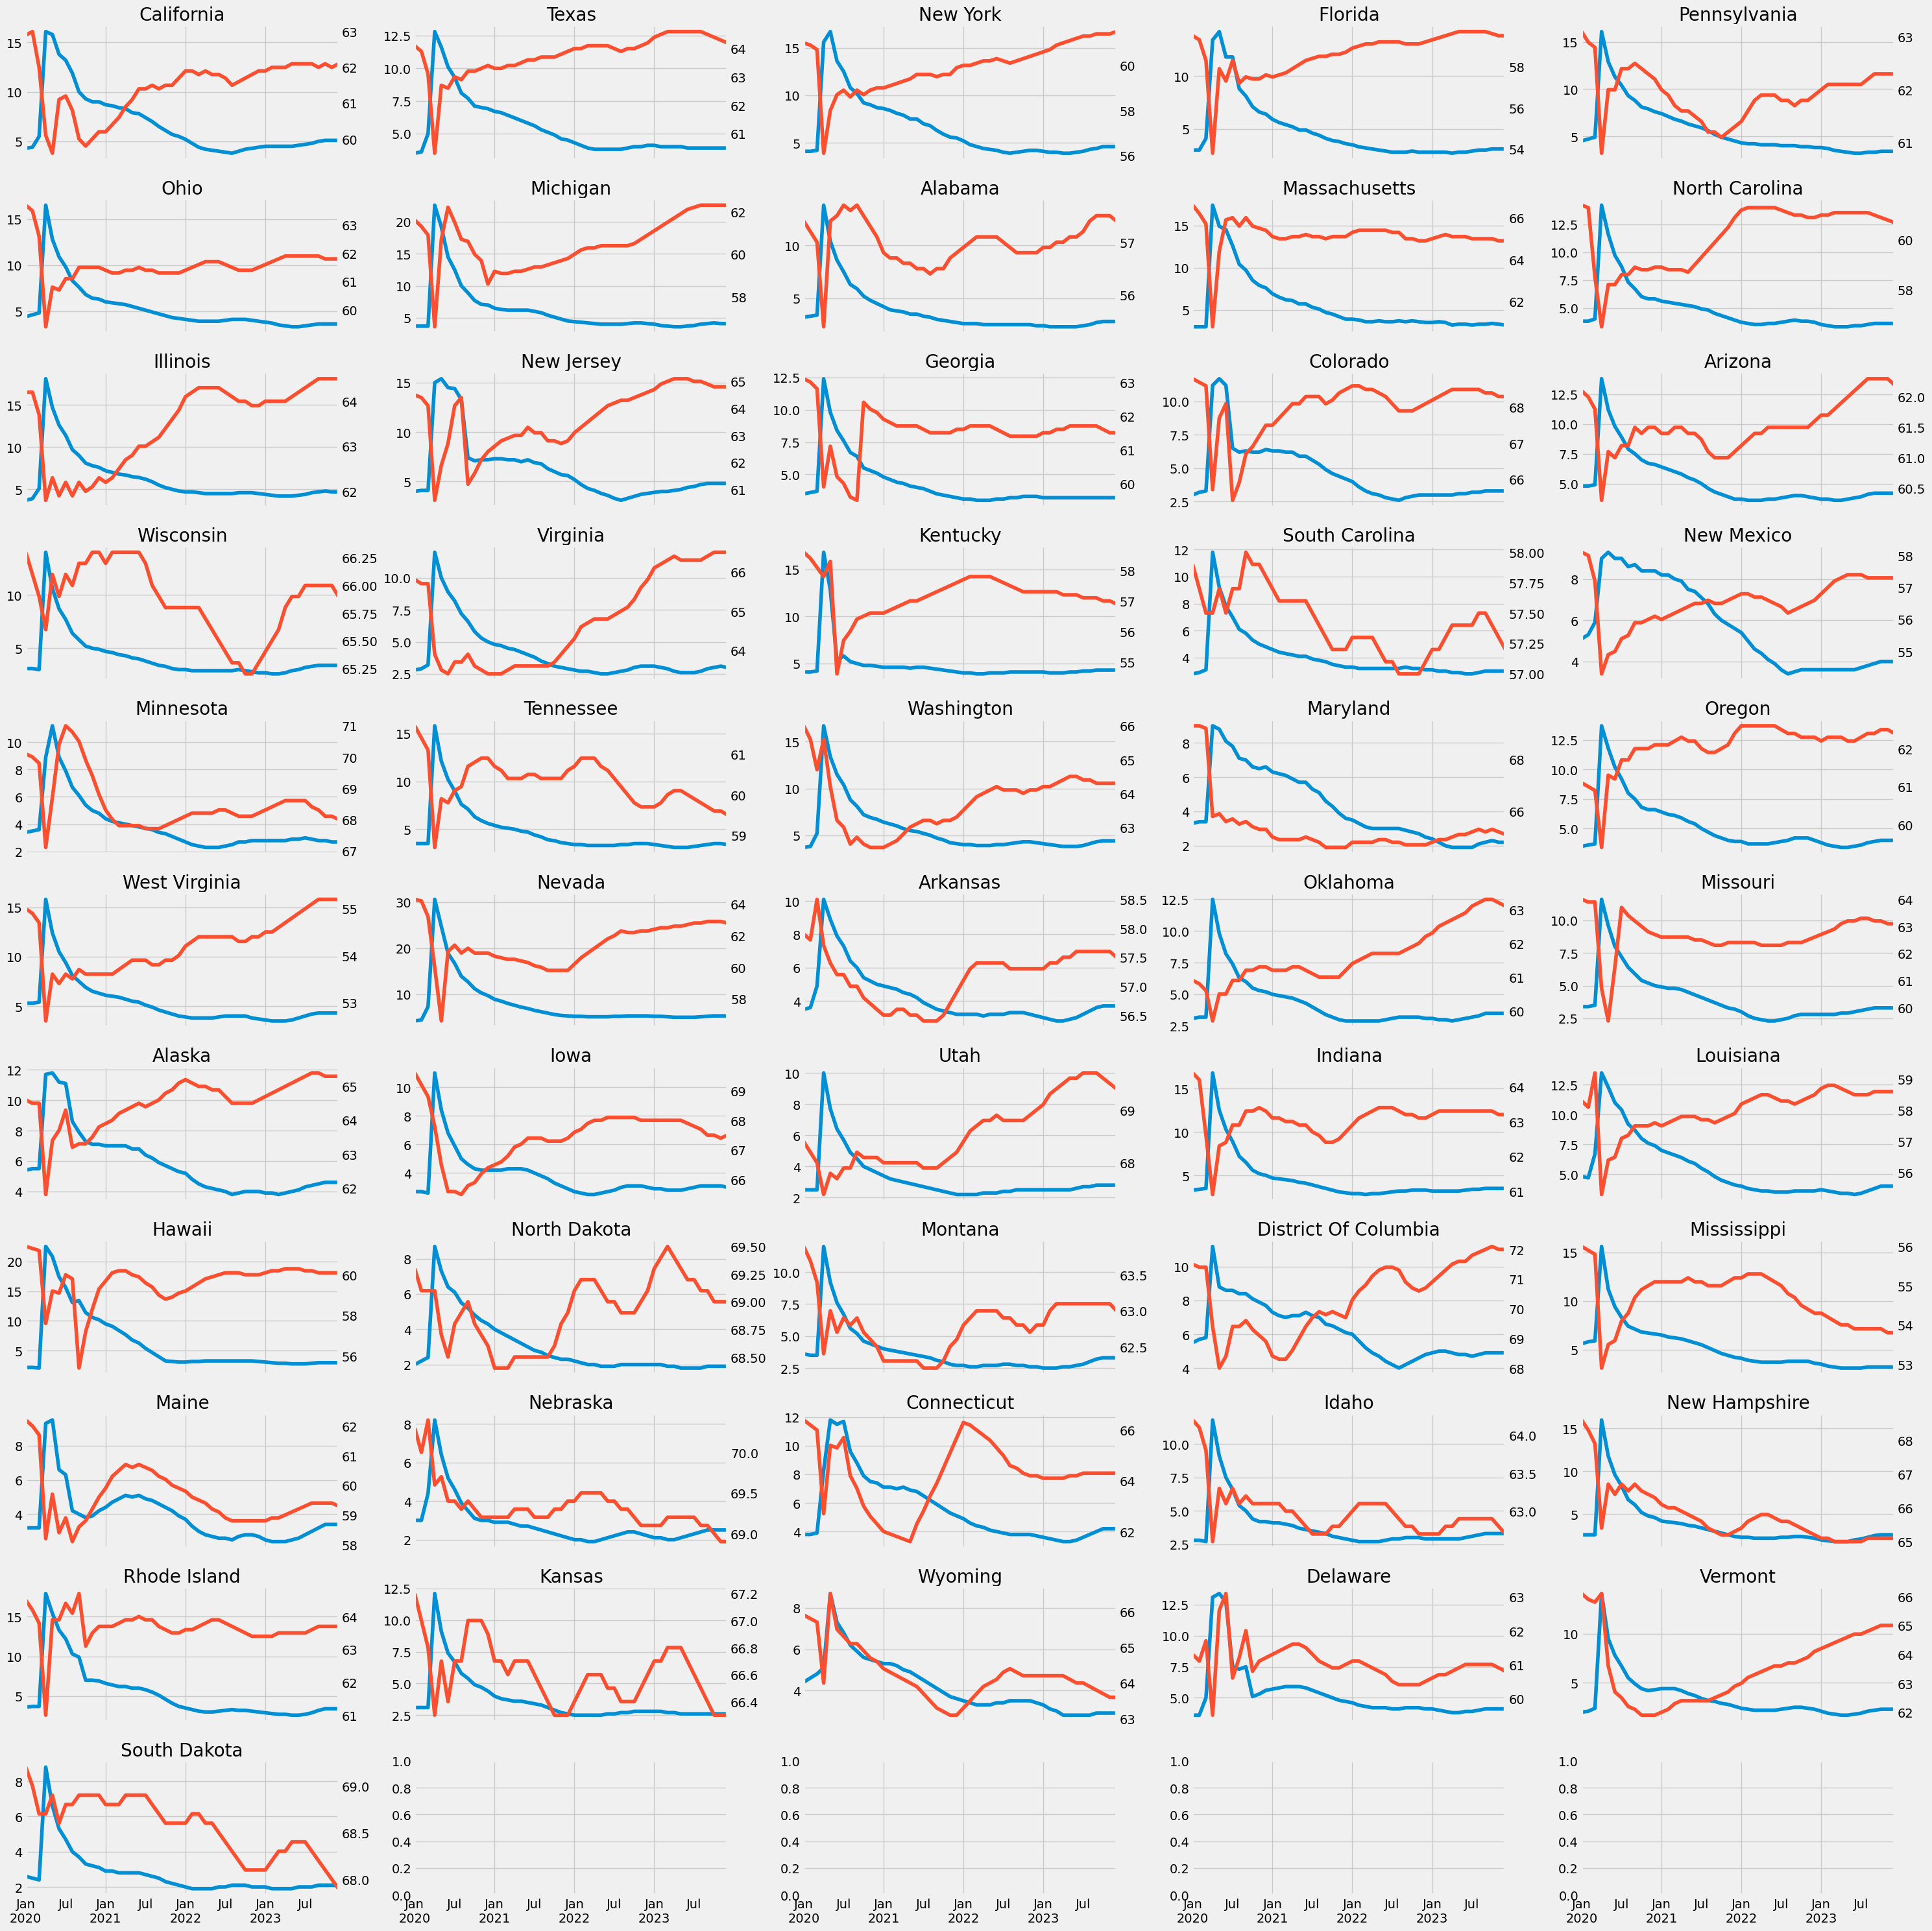

In [168]:
fig, axs = plt.subplots(11, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_state.columns:
    #if state in ["District Of Columbia","Puerto Rico"]:
        #continue
    ax2 = axs[i].twinx()
    unemployment_state.query('index >= 2020 and index < 2024')[state] \
        .plot(ax=axs[i], label='Unemployment')
    participation_state.query('index >= 2020 and index < 2024')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

## Using variable inside query function

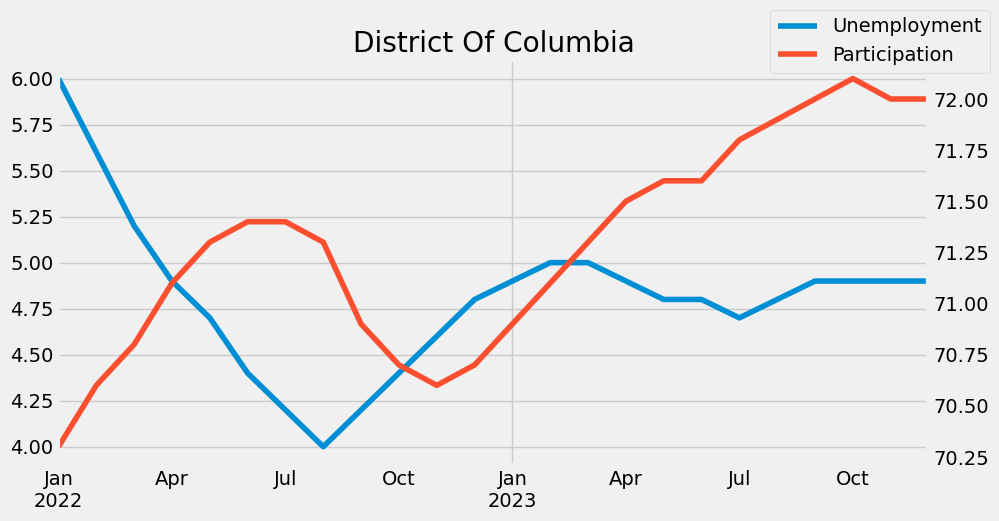

In [172]:
state = 'District Of Columbia'
start_year = 2022
end_year = 2024
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = unemployment_state.asfreq('MS')
l1 = uemp_states2.query('index >= @start_year and index < @end_year')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = participation_state.dropna().query('index >= @start_year and index < @end_year')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()